<img src = "https://www.eesc.europa.eu/sites/default/files/styles/large/public/images/shutterstock_1642888921.jpg?itok=P9-6YhGd" width=50%>

## Importing the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pickle
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.impute import KNNImputer
from sklearn.linear_model import BayesianRidge
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from joblib import Parallel, delayed
from sklearn.model_selection import learning_curve

## Load and Prepare Data

In [2]:
df=pd.read_csv('C:/Users/AERO/Downloads/Video/Project 1 - Covid Vaccination/country_vaccinations.csv')

In [3]:
# بارگذاری دیتافریم از فایل pickle
with open('imputed_df.pkl', 'rb') as f:
    loaded_df = pickle.load(f)

In [4]:
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [5]:
df.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,1.745100e+04,1.655400e+04,1.379500e+04,1.442100e+04,3.094800e+04,17451.000000,16554.000000,13795.000000,30948.000000
mean,1.200444e+07,5.704551e+06,3.293973e+06,2.273661e+05,1.149718e+05,29.283554,19.181574,12.340698,3426.365969
std,6.622349e+07,2.101612e+07,1.234425e+07,1.258556e+06,8.460548e+05,35.042304,20.734193,15.857682,4572.377684
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.262015e+05,9.999100e+04,4.832450e+04,4.324000e+03,8.520000e+02,2.970000,2.580000,1.320000,412.000000
50%,8.890780e+05,6.450395e+05,3.632100e+05,2.133600e+04,6.471000e+03,14.510000,10.730000,5.560000,1851.000000
75%,4.213660e+06,2.809300e+06,1.635366e+06,9.441700e+04,3.545425e+04,44.460000,30.890000,17.610000,5123.000000
max,1.426347e+09,6.220000e+08,2.232990e+08,2.474100e+07,2.242429e+07,232.350000,116.660000,115.690000,118759.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31240 entries, 0 to 31239
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              31240 non-null  object 
 1   iso_code                             31240 non-null  object 
 2   date                                 31240 non-null  object 
 3   total_vaccinations                   17451 non-null  float64
 4   people_vaccinated                    16554 non-null  float64
 5   people_fully_vaccinated              13795 non-null  float64
 6   daily_vaccinations_raw               14421 non-null  float64
 7   daily_vaccinations                   30948 non-null  float64
 8   total_vaccinations_per_hundred       17451 non-null  float64
 9   people_vaccinated_per_hundred        16554 non-null  float64
 10  people_fully_vaccinated_per_hundred  13795 non-null  float64
 11  daily_vaccinations_per_milli

In [7]:
for col in df.columns:
    # x=df[col].unique()
    y=len(df[col].unique())
    # print(f'{col} unique ={x}')
    print(f'({col}) unique count ={y}')

(country) unique count =218
(iso_code) unique count =218
(date) unique count =226
(total_vaccinations) unique count =16998
(people_vaccinated) unique count =15955
(people_fully_vaccinated) unique count =13073
(daily_vaccinations_raw) unique count =12464
(daily_vaccinations) unique count =17642
(total_vaccinations_per_hundred) unique count =6968
(people_vaccinated_per_hundred) unique count =5432
(people_fully_vaccinated_per_hundred) unique count =3944
(daily_vaccinations_per_million) unique count =9401
(vaccines) unique count =53
(source_name) unique count =92
(source_website) unique count =148


In [8]:
df.isnull().sum()

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     13789
people_vaccinated                      14686
people_fully_vaccinated                17445
daily_vaccinations_raw                 16819
daily_vaccinations                       292
total_vaccinations_per_hundred         13789
people_vaccinated_per_hundred          14686
people_fully_vaccinated_per_hundred    17445
daily_vaccinations_per_million           292
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

## Data Preprocessing

In [9]:
df['date_time'] = pd.to_datetime(df['date'])

# Extract components and create new columns
df['year'] = df['date_time'].dt.year
df['month'] = df['date_time'].dt.month
df['day'] = df['date_time'].dt.day

In [10]:
# Drop one or more columns using df.drop()
columns_to_drop = ['country', 'source_website','date_time']
df = df.drop(columns=columns_to_drop, axis=1)

In [11]:
df = df.reindex(columns=['iso_code','year','month','day', 
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name','total_vaccinations'])

In [12]:
df

,iso_code,year,month,day,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,total_vaccinations
0,AFG,2021,2,22,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,0.0
1,AFG,2021,2,23,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,NaN
2,AFG,2021,2,24,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,NaN
3,AFG,2021,2,25,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,NaN
4,AFG,2021,2,26,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31235,ZWE,2021,7,11,895980.0,595417.0,NaN,18598.0,10.03,6.03,4.01,1251.0,Sinopharm/Beijing,Ministry of Health,1491397.0
31236,ZWE,2021,7,12,926312.0,605556.0,40471.0,23205.0,10.31,6.23,4.07,1561.0,Sinopharm/Beijing,Ministry of Health,1531868.0
31237,ZWE,2021,7,13,955656.0,619883.0,43671.0,27567.0,10.60,6.43,4.17,1855.0,Sinopharm/Beijing,Ministry of Health,1575539.0
31238,ZWE,2021,7,14,988746.0,624894.0,38101.0,30698.0,10.86,6.65,4.20,2065.0,Sinopharm/Beijing,Ministry of Health,1613640.0


تفاوت اصلی بین **روش ایمپیوتر تکراری (Iterative Imputer)** و **ایمپیوتر KNN** در نحوه‌ی پر کردن داده‌های از دست رفته است. هر کدام از این روش‌ها به روشی متفاوت داده‌های گمشده را پردازش می‌کنند.

### ۱. **ایمپیوتر تکراری (Iterative Imputer)**
- **نحوه‌ی کار**: ایمپیوتر تکراری، هر ویژگی (ستون) با مقادیر گمشده را به عنوان تابعی از سایر ویژگی‌ها مدل می‌کند و به طور تکراری مقادیر گمشده را تخمین می‌زند. برای هر ستون گمشده، یک مدل رگرسیون ایجاد می‌شود و از سایر ستون‌ها (ویژگی‌های غیر گمشده) برای پیش‌بینی مقادیر گمشده استفاده می‌کند. این فرآیند تکرار می‌شود تا مقادیر تخمینی پایدار شوند.
- **الگوریتم**: رویکرد چند متغیره با استفاده از رگرسیون خطی، درخت‌های تصمیم، یا سایر تخمین‌زن‌ها.
- **مزایا**:
  - قادر به درک روابط پیچیده بین ویژگی‌ها است.
  - در داده‌های چند متغیره انعطاف‌پذیری بیشتری دارد.
  - در مواردی که مقادیر گمشده تصادفی نیستند (مانند داده‌های وابسته به هم)، عملکرد خوبی دارد.
- **معایب**:
  - نسبت به KNN کندتر است، به خصوص در مجموعه داده‌های بزرگ به دلیل فرآیند تکراری و ساخت مدل.
  - پیچیده‌تر و محاسباتی سنگین‌تر است.

### ۲. **ایمپیوتر KNN (K-Nearest Neighbors Imputer)**
- **نحوه‌ی کار**: ایمپیوتر KNN مقادیر گمشده را بر اساس میانگین یا میانگین وزنی از نزدیک‌ترین همسایگان (k مورد) برای هر مشاهده‌ای که مقادیر گمشده دارد، پر می‌کند. این روش برای هر مقدار گمشده، نزدیک‌ترین همسایگان را در فضای ویژگی جستجو می‌کند و از مقادیر آن‌ها برای پر کردن داده‌ی گمشده استفاده می‌کند.
- **الگوریتم**: الگوریتم همسایه‌های نزدیک (Nearest-neighbors) بر اساس فاصله اقلیدسی (یا سایر معیارهای فاصله).
- **مزایا**:
  - ساده و قابل فهم است.
  - برای مجموعه داده‌های کوچک تا متوسط که بین ویژگی‌ها همبستگی‌های محلی وجود دارد مناسب است.
  - غیرپارامتریک است و نیازی به فرضیات در مورد توزیع داده ندارد.
- **معایب**:
  - به مقیاس حساس است: ویژگی‌هایی با دامنه‌های بزرگ می‌توانند در محاسبه فاصله تسلط پیدا کنند، بنابراین مقیاس‌بندی داده‌ها لازم است.
  - برای مجموعه داده‌های بزرگ به دلیل نیاز به محاسبه فاصله بین تمام نقاط، کندتر است.
  - در صورت وجود روابط پیچیده یا وابستگی‌های جهانی مناسب نیست (این روش نیاز به شباهت محلی دارد).

### تفاوت‌های کلیدی:

| ویژگی                         | **ایمپیوتر تکراری (Iterative Imputer)**     | **ایمپیوتر KNN**                              |
|-------------------------------|---------------------------------------------|----------------------------------------------|
| **روش کار**                    | مدل‌سازی تکراری هر ویژگی با استفاده از رگرسیون یا روش‌های دیگر | استفاده از نزدیک‌ترین همسایگان بر اساس فاصله در فضای ویژگی |
| **نحوه‌ی پر کردن مقادیر گمشده**| از سایر ستون‌ها به عنوان پیش‌بینی‌کننده برای پر کردن استفاده می‌کند | از ردیف‌های مشابه (همسایگان) برای پر کردن مقادیر گمشده استفاده می‌کند |
| **پیچیدگی**                    | پیچیدگی بالاتر به دلیل ماهیت تکراری و ساخت مدل | ساده‌تر از نظر محاسباتی (مبتنی بر فاصله) |
| **سرعت**                       | کندتر، به ویژه در مجموعه داده‌های بزرگ | سریع‌تر در مجموعه داده‌های کوچک، کندتر با افزایش اندازه داده |
| **مقیاس‌پذیری**                | مقیاس‌پذیری بالاتر، مناسب برای روابط پیچیده | کمتر مقیاس‌پذیر، محاسبات با افزایش اندازه داده‌ها بیشتر می‌شود |
| **مورد استفاده‌ی مناسب**       | زمانی که بین متغیرها روابط معنی‌داری وجود دارد | زمانی که همبستگی‌های محلی و داده‌های کوچک داریم |
| **حساسیت به مقیاس**            | کمتر حساس است (بستگی به مدلی دارد که برای ایمپوت انتخاب می‌شود) | حساس به مقیاس‌بندی ویژگی‌ها (نیاز به نرمال‌سازی دارد) |

### چه زمانی از هر روش استفاده کنیم؟
- **ایمپیوتر تکراری**:
  - اگر روابط پیچیده‌ای بین ویژگی‌ها انتظار می‌رود.
  - اگر مجموعه داده خیلی بزرگ نیست و دقت برای شما از سرعت مهم‌تر است.
  - اگر می‌توانید قدرت محاسباتی بیشتری اختصاص دهید و با محاسبات کندتر مشکلی ندارید.

- **ایمپیوتر KNN**:
  - اگر به دنبال روشی ساده‌تر و سریع‌تر برای مجموعه داده‌های کوچک هستید.
  - اگر داده‌هایتان همبستگی‌های محلی دارند (یعنی می‌توان مقادیر گمشده را از ردیف‌های مشابه پر کرد).
  - اگر با داده‌های پیوسته کار می‌کنید و ویژگی‌های داده‌ها را نرمال‌سازی کرده‌اید.

هر کدام از این روش‌ها نقاط قوت و ضعف خود را دارند و انتخاب آن‌ها به اندازه مجموعه داده، پیچیدگی روابط بین متغیرها و نیاز شما بستگی دارد.

بله، حتماً! با توجه به وضعیت داده‌های شما که تعداد زیادی مقادیر گمشده در ستون‌های مرتبط با واکسیناسیون (مانند **total_vaccinations**، **people_vaccinated**، **people_fully_vaccinated**) وجود دارد، پیشنهاد می‌کنم از **روش ایمپیوتر تکراری (Iterative Imputer)** استفاده کنید. 

### دلیل انتخاب ایمپیوتر تکراری:
1. شما ستون‌های **مرتبط با یکدیگر** دارید (مانند تعداد واکسن‌ها، تعداد افرادی که واکسینه شده‌اند، تعداد افرادی که به طور کامل واکسینه شده‌اند) که احتمالاً **روابط قوی** بین این ستون‌ها وجود دارد.
2. ایمپیوتر تکراری می‌تواند از این روابط استفاده کند و با استفاده از رویکرد چند متغیره، مقادیر گمشده را تخمین بزند. این روش برای زمانی که بخش زیادی از داده‌ها گم شده‌اند (مثلاً بیش از ۴۰٪ در بعضی از ستون‌ها)، **موثرتر** است.
3. این روش می‌تواند **روابط پیچیده بین متغیرها** را بهتر مدیریت کند و دقت بیشتری در پر کردن مقادیر گمشده ارائه دهد، به ویژه در ستون‌هایی که درصد زیادی از داده‌ها از دست رفته است.

### چرا KNN مناسب نیست:
- تعداد بالای مقادیر گمشده در ستون‌هایی مانند **total_vaccinations** یا **people_fully_vaccinated** باعث می‌شود KNN کمتر قابل اعتماد باشد، زیرا ممکن است **ردیف‌های مشابه کافی** برای تخمین داده‌های گمشده وجود نداشته باشد.
- KNN برای زمانی مناسب است که همبستگی‌های محلی وجود داشته باشد، اما در اینجا به دلیل تعداد بالای مقادیر گمشده، پیدا کردن همسایگان مناسب ممکن است چالش‌برانگیز باشد.
- همچنین KNN به **مقیاس‌بندی داده‌ها** حساس است، و باید مقادیر ستون‌ها به درستی نرمال‌سازی شوند.

### نتیجه‌گیری:
با توجه به اینکه:
- تعداد زیادی مقادیر گمشده در ستون‌های مختلف دارید.
- و نیاز به روشی دارید که بتواند روابط پیچیده بین متغیرها را در نظر بگیرد.

**ایمپیوتر تکراری (Iterative Imputer)** بهترین انتخاب است. این روش برای مجموعه داده‌هایی که **مقادیر گمشده زیادی دارند** و روابط بین متغیرها پیچیده است، مناسب‌تر خواهد بود.

اگر داده‌های کمتری گم شده بود یا مجموعه داده کوچکتر بود، KNN گزینه ساده‌تر و سریع‌تری بود، اما در این وضعیت، ایمپیوتر تکراری دقت و نتایج بهتری ارائه خواهد داد.



بله، با توجه به اینکه شما **32,400 ردیف** داده دارید، همچنان **روش ایمپیوتر تکراری (Iterative Imputer)** برای مجموعه داده شما مناسب است. این روش همچنان می‌تواند روابط بین متغیرها را با دقت بیشتری در مقایسه با روش‌های ساده‌تر مانند **KNN** مدیریت کند، به خصوص اگر تعداد زیادی از داده‌ها گم شده باشد.

### دلایل:
1. **حجم داده‌ها**: با اینکه 32,400 ردیف داده دارید، این تعداد برای ایمپیوتر تکراری **بسیار قابل مدیریت** است. این روش معمولاً در حجم داده‌های متوسط مانند داده‌های شما به خوبی کار می‌کند.
2. **روابط پیچیده**: در داده‌های مرتبط با واکسیناسیون، متغیرهای مختلف مانند تعداد واکسن‌ها، درصد جمعیت واکسینه شده، و واکسن‌های روزانه به هم وابستگی زیادی دارند. ایمپیوتر تکراری می‌تواند این روابط را بهتر در نظر بگیرد.
3. **دقت**: به دلیل تعداد بالای مقادیر گمشده در برخی ستون‌ها (بیش از 40٪)، ایمپیوتر تکراری می‌تواند با استفاده از اطلاعات سایر ستون‌ها تخمین‌های دقیق‌تری ارائه دهد.
4. **مناسب برای داده‌های چند متغیره**: این روش برای داده‌هایی که **چندین ستون مرتبط با هم** دارند، به خصوص وقتی تعداد زیادی از داده‌ها گم شده است، بهترین عملکرد را دارد.

### چالش‌های محاسباتی:
- **سرعت و زمان محاسبه**: هرچند ایمپیوتر تکراری در مجموعه داده‌های بزرگ ممکن است کمی کندتر باشد، اما در مورد داده‌های شما (32,400 ردیف) مشکلی از این لحاظ نخواهد داشت، و با استفاده از منابع محاسباتی مناسب (مانند پردازنده قوی یا حافظه کافی)، این روش کارایی خوبی دارد.
  
بنابراین، حتی با تعداد 32,400 ردیف، ایمپیوتر تکراری همچنان **بهترین انتخاب** برای پر کردن مقادیر گمشده و حفظ دقت بالاست.

In [13]:
'''def impute_data(df, numeric_columns, method='simple', max_iter=10):
    # تابع برای پر کردن داده‌های گم‌شده در ستون‌های عددی مشخص شده
    if method == 'simple':
        # اگر روش 'simple' انتخاب شده باشد، از میانگین برای پر کردن داده‌ها استفاده می‌شود
        imputer = SimpleImputer(strategy='mean')
    elif method == 'knn':
        # اگر روش 'knn' انتخاب شده باشد، از روش KNN با ۵ نزدیک‌ترین همسایه برای پر کردن داده‌ها استفاده می‌شود
        imputer = KNNImputer(n_neighbors=5)
    elif method == 'iterative':
        # اگر روش 'iterative' انتخاب شده باشد، از یک مدل تکراری ExtraTrees برای پر کردن داده‌ها استفاده می‌شود
        imputer = IterativeImputer(estimator=ExtraTreesRegressor(), max_iter=max_iter, random_state=0)
    else:
        # اگر هیچکدام از روش‌های بالا انتخاب نشده باشد، یک خطا رخ می‌دهد
        raise ValueError("Invalid imputation method")

    # پر کردن داده‌های گم‌شده در ستون‌های عددی مشخص شده
    df[numeric_columns] = imputer.fit_transform(df[numeric_columns])
    return df

# انتخاب ستون‌های عددی برای پر کردن داده‌های گم‌شده
numeric_columns = [
    'people_vaccinated', 'people_fully_vaccinated', 'daily_vaccinations_raw',
    'daily_vaccinations', 'total_vaccinations_per_hundred', 
    'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred',
    'daily_vaccinations_per_million', 'total_vaccinations'
]

# امتحان روش‌های مختلف پر کردن داده‌ها
methods = ['simple', 'knn', 'iterative']
max_iters = [10, 15, 20]

for method in methods:
    try:
        if method == 'iterative':
            # اگر روش 'iterative' باشد، چندین مقدار برای max_iter امتحان می‌شود
            for max_iter in max_iters:
                try:
                    # اجرای پر کردن داده‌ها با استفاده از max_iter مشخص شده
                    df = impute_data(df, numeric_columns, method=method, max_iter=max_iter)
                    print(f"Successfully imputed using {method} method with max_iter={max_iter}")
                    break
                except Warning as w:
                    # نمایش پیام هشدار در صورت وقوع
                    print(f"Warning with {method} method, max_iter={max_iter}: {w}")
        else:
            # اگر روش 'simple' یا 'knn' باشد، پر کردن داده‌ها بدون max_iter انجام می‌شود
            df = impute_data(df, numeric_columns, method=method)
            print(f"Successfully imputed using {method} method")
        break
    except Exception as e:
        # در صورت بروز خطا در یک روش، پیام خطا چاپ می‌شود و روش بعدی امتحان می‌شود
        print(f"Error with {method} method: {e}")

# نمایش پیامی که نشان‌دهنده پایان پر کردن داده‌ها است
print("Imputation complete. Check df for results.")
'''

'def impute_data(df, numeric_columns, method=\'simple\', max_iter=10):\n    # تابع برای پر کردن داده\u200cهای گم\u200cشده در ستون\u200cهای عددی مشخص شده\n    if method == \'simple\':\n        # اگر روش \'simple\' انتخاب شده باشد، از میانگین برای پر کردن داده\u200cها استفاده می\u200cشود\n        imputer = SimpleImputer(strategy=\'mean\')\n    elif method == \'knn\':\n        # اگر روش \'knn\' انتخاب شده باشد، از روش KNN با ۵ نزدیک\u200cترین همسایه برای پر کردن داده\u200cها استفاده می\u200cشود\n        imputer = KNNImputer(n_neighbors=5)\n    elif method == \'iterative\':\n        # اگر روش \'iterative\' انتخاب شده باشد، از یک مدل تکراری ExtraTrees برای پر کردن داده\u200cها استفاده می\u200cشود\n        imputer = IterativeImputer(estimator=ExtraTreesRegressor(), max_iter=max_iter, random_state=0)\n    else:\n        # اگر هیچکدام از روش\u200cهای بالا انتخاب نشده باشد، یک خطا رخ می\u200cدهد\n        raise ValueError("Invalid imputation method")\n\n    # پر کردن داده\u200cهای گم\u200cشده در

In [14]:
def impute_data(df, numeric_columns, method='iterative', max_iter=10):
    # Initialize the Iterative Imputer with ExtraTrees as estimator
    imputer = IterativeImputer(estimator=BayesianRidge(), max_iter=max_iter, random_state=0)

    # Apply the imputer to the numeric columns in the DataFrame
    df[numeric_columns] = imputer.fit_transform(df[numeric_columns])
    return df

# Define numeric columns to impute
numeric_columns = [
    'people_vaccinated', 'people_fully_vaccinated', 'daily_vaccinations_raw',
    'daily_vaccinations', 'total_vaccinations_per_hundred', 
    'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred',
    'daily_vaccinations_per_million', 'total_vaccinations'
]

# Set max_iter values to try
max_iters = [20, 30, 40]

# Try the iterative method with different max_iter values
for max_iter in max_iters:
    try:
        # Attempt imputation with the current max_iter
        df = impute_data(df, numeric_columns, max_iter=max_iter)
        print(f"Successfully imputed using iterative method with max_iter={max_iter}")
        break
    except Warning as w:
        print(f"Warning with iterative method, max_iter={max_iter}: {w}")
    except Exception as e:
        print(f"Error with iterative method, max_iter={max_iter}: {e}")

print("Iterative imputation complete. Check df for results.")


Successfully imputed using iterative method with max_iter=20
Iterative imputation complete. Check df for results.


D:\anacoda\envs\a.i\lib\site-packages\sklearn\impute\_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


در ابتدا بهتر است **پر کردن مقادیر گمشده (NaN)** انجام شود و سپس به **حذف داده‌های پرت (Outliers)** بپردازیم. دلیل این ترتیب به شرح زیر است:

### 1. **چرا ابتدا پر کردن مقادیر گمشده؟**
- **داده‌های گمشده (NaN)** ممکن است باعث شوند که تحلیل داده‌های پرت دقیق نباشد. بسیاری از روش‌های تشخیص داده‌های پرت بر اساس توزیع داده‌ها یا الگوریتم‌های خاص محاسبه می‌شوند. اگر مقادیر گمشده در برخی از ردیف‌ها وجود داشته باشد، این الگوریتم‌ها نمی‌توانند به درستی عمل کنند.
- اگر **داده‌های پرت** را بدون پر کردن NaN حذف کنید، ممکن است بعداً پر کردن مقادیر گمشده براساس داده‌های ناقص انجام شود و این به **کاهش دقت** در پر کردن داده‌ها منجر شود.
  
### 2. **چرا حذف داده‌های پرت بعد از پر کردن NaN؟**
- پس از اینکه مقادیر گمشده با روش‌های مناسب (مثل **ایمپیوتر تکراری** یا **KNN Imputer**) پر شدند، توزیع داده‌ها **کامل‌تر و صحیح‌تر** خواهد بود. این باعث می‌شود که شناسایی داده‌های پرت با دقت بیشتری انجام شود.
- اگر پر کردن NaN را بعد از حذف داده‌های پرت انجام دهید، ممکن است برخی از داده‌های **مفید و غیرپرت** که به عنوان پرت شناسایی می‌شوند از بین بروند و الگوریتم پر کردن داده‌ها دچار خطا شود.

### خلاصه:
1. **ابتدا مقادیر گمشده (NaN) را پر کنید** تا مجموعه داده کامل و بدون نقص شود.
2. سپس **داده‌های پرت** را شناسایی و حذف کنید تا کیفیت تحلیل و مدل‌سازی بالا برود.

این ترتیب باعث می‌شود که هم **پر کردن داده‌های گمشده دقیق‌تر** باشد و هم **تشخیص داده‌های پرت** به درستی انجام شود.

In [15]:
print(df[numeric_columns].isnull().sum())

people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
total_vaccinations                     0
dtype: int64


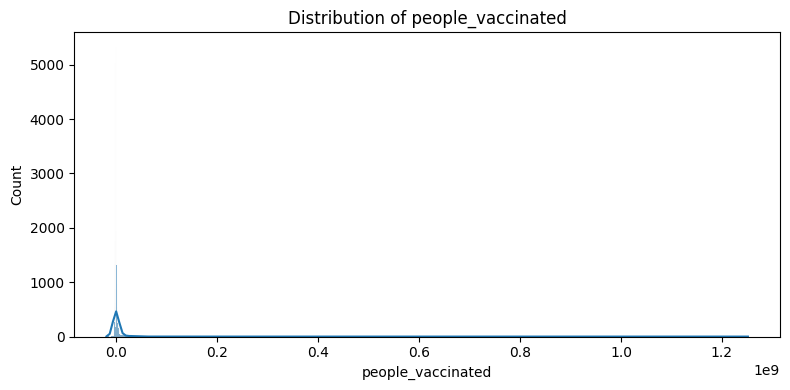

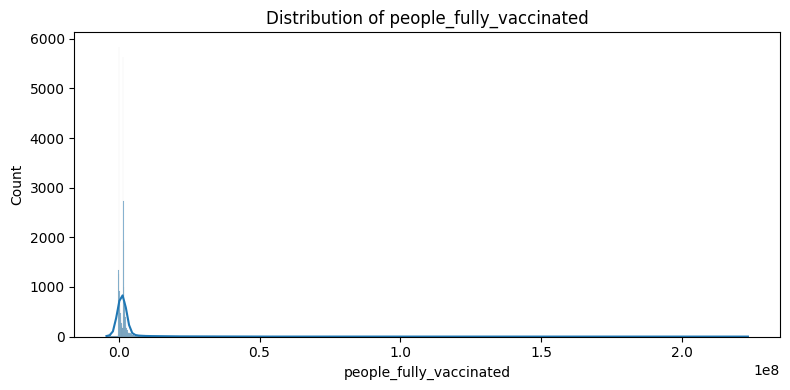

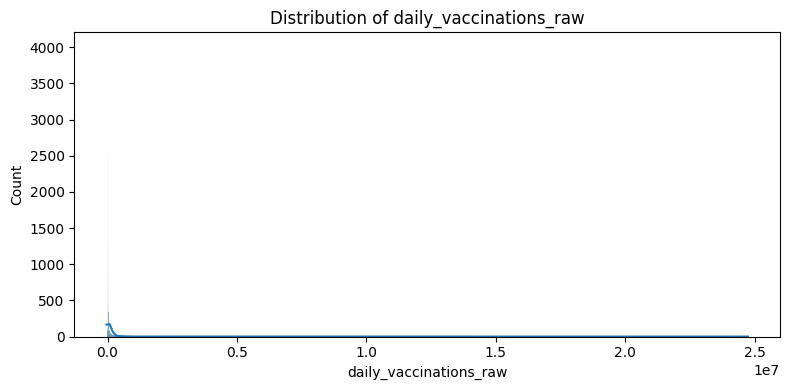

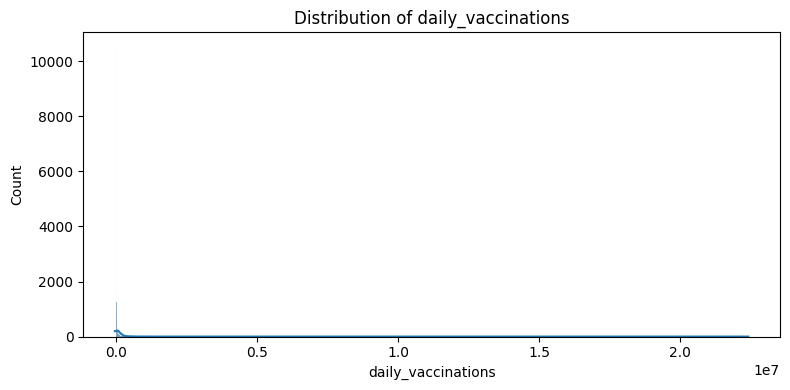

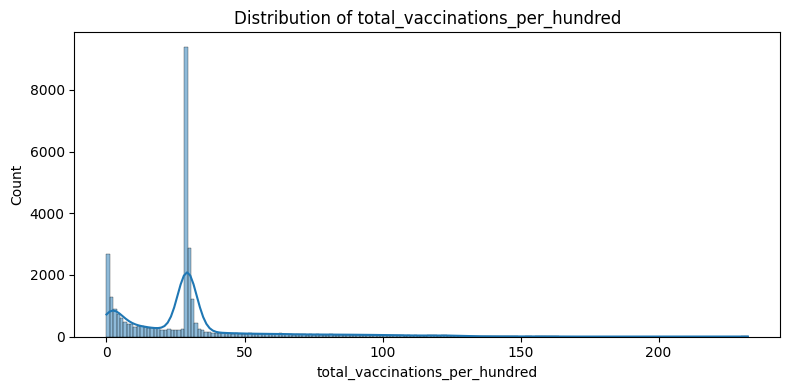

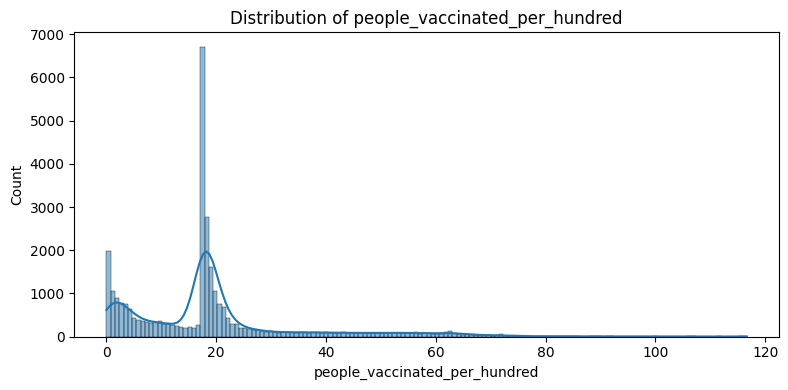

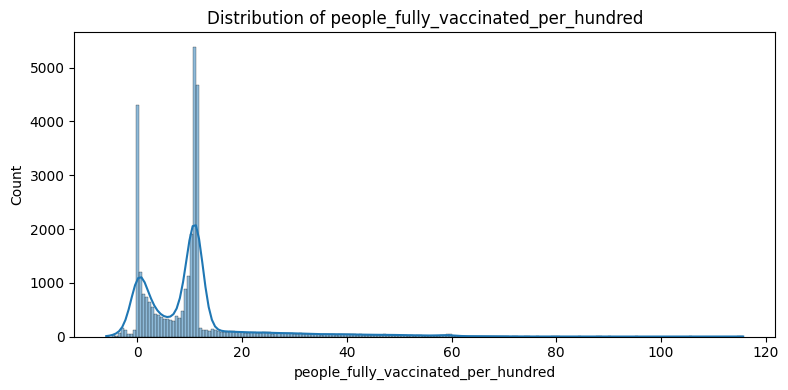

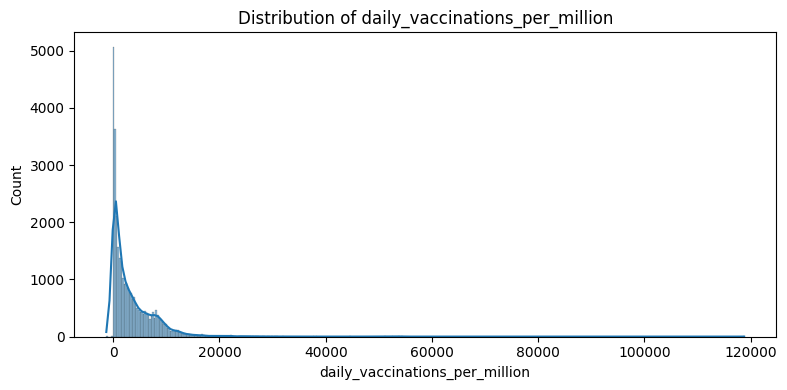

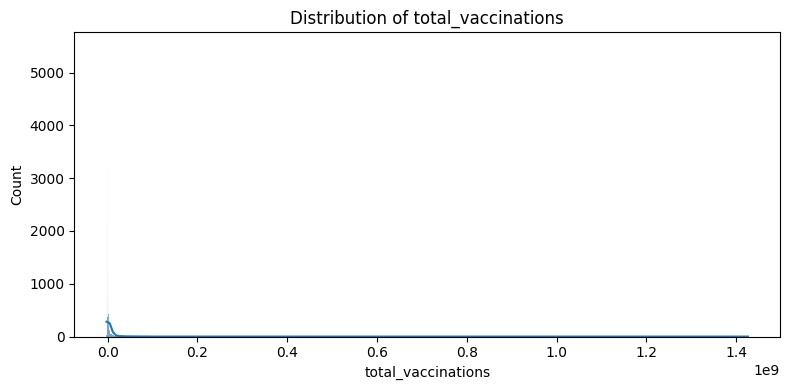

In [16]:
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

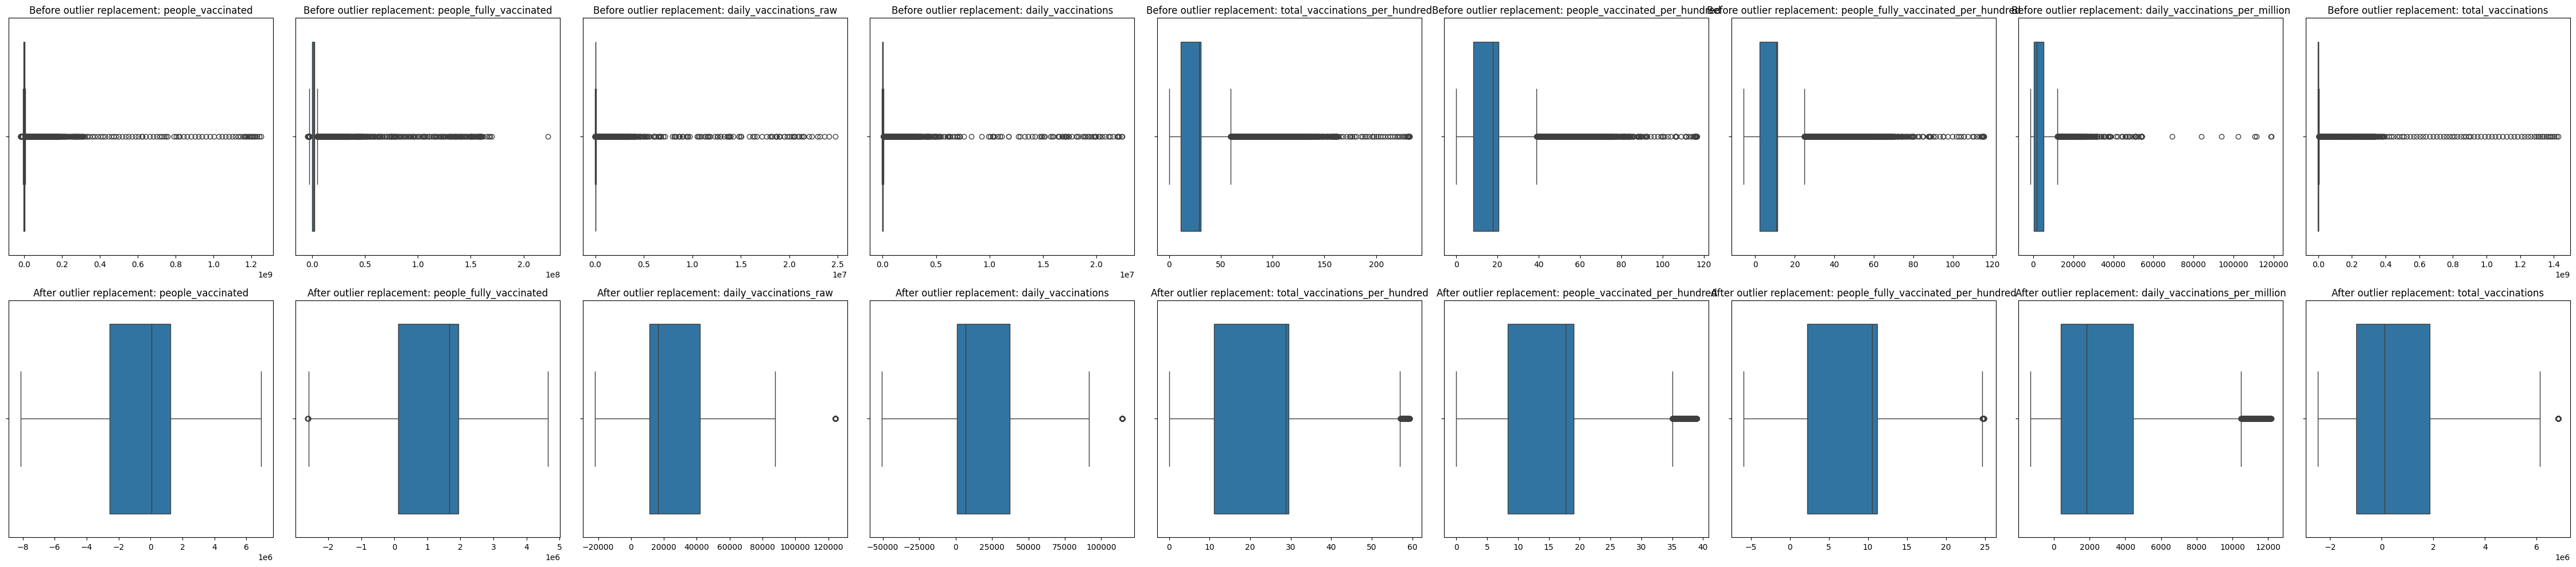


Summary statistics of original data:
       people_vaccinated  people_fully_vaccinated  daily_vaccinations_raw  \
count       3.124000e+04             3.124000e+04            3.124000e+04   
mean        4.381269e+06             2.531856e+06            1.243491e+05   
std         4.344131e+07             9.232475e+06            8.643190e+05   
min        -1.934486e+07            -4.309883e+06           -4.093907e+04   
25%        -2.570137e+06             9.523825e+04            1.123522e+04   
50%         4.700650e+04             1.667871e+06            1.641151e+04   
75%         1.227210e+06             1.922963e+06            4.187300e+04   
max         1.251607e+09             2.232990e+08            2.474100e+07   

       daily_vaccinations  total_vaccinations_per_hundred  \
count        3.124000e+04                    31240.000000   
mean         1.145763e+05                       29.429207   
std          8.421162e+05                       26.387757   
min         -5.052798e+0

In [17]:
def replace_outliers(df, columns):
    """
    Function to replace outliers with the mean value
    """
    df_clean = df.copy()  # Copy of the original dataframe
    stats = {}
    for column in columns:
        try:
            # Calculate IQR
            Q1 = df_clean[column].quantile(0.25)
            Q3 = df_clean[column].quantile(0.75)
            IQR = Q3 - Q1
            
            # Define bounds
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Replace outliers with mean
            mean_value = df_clean[column].mean()  # Calculate mean
            outliers = (df_clean[column] < lower_bound) | (df_clean[column] > upper_bound)
            
            df_clean.loc[outliers, column] = mean_value
            
            stats[column] = {
                'outliers_count': outliers.sum(),
                'outliers_percentage': (outliers.sum() / len(df_clean)) * 100,
                'lower_bound': lower_bound,
                'upper_bound': upper_bound
            }
        except Exception as e:
            print(f"Error processing column {column}: {str(e)}")
            stats[column] = {'error': str(e)}
    
    return df_clean, stats

def plot_boxplots(df_before, df_after, columns):
    n = len(columns)
    fig, axes = plt.subplots(2, n, figsize=(5*n, 10))
    
    for i, column in enumerate(columns):
        sns.boxplot(x=df_before[column], ax=axes[0, i])
        axes[0, i].set_title(f'Before outlier replacement: {column}')
        axes[0, i].set_xlabel('')
        
        sns.boxplot(x=df_after[column], ax=axes[1, i])
        axes[1, i].set_title(f'After outlier replacement: {column}')
        axes[1, i].set_xlabel('')
    
    plt.tight_layout()
    plt.show()

# Assuming df is your DataFrame and numeric_columns is a list of numeric column names
# df = pd.read_csv('your_data.csv')
numeric_columns = ['people_vaccinated', 'people_fully_vaccinated', 'daily_vaccinations_raw',
                   'daily_vaccinations', 'total_vaccinations_per_hundred', 
                   'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred',
                   'daily_vaccinations_per_million', 'total_vaccinations']

# Replace outliers and get statistics
df_clean, stats = replace_outliers(df, numeric_columns)

# Plot before and after
plot_boxplots(df, df_clean, numeric_columns)

# Print statistics
print("\nSummary statistics of original data:")
print(df[numeric_columns].describe())

print("\nSummary statistics of cleaned data:")
print(df_clean[numeric_columns].describe())

print("\nOutlier replacement statistics:")
for column, stat in stats.items():
    print(f"\n{column}:")
    if 'error' in stat:
        print(f"Error in processing: {stat['error']}")
    else:
        print(f"Number of outliers: {stat['outliers_count']}")
        print(f"Percentage of outliers: {stat['outliers_percentage']:.2f}%")
        print(f"Lower bound: {stat['lower_bound']:.2f}")
        print(f"Upper bound: {stat['upper_bound']:.2f}")

## EDA

چکار میکنه
plt.tight_layout() یکی از دستورات مفید در کتابخانه Matplotlib برای تنظیم فضای بین زیرپلات‌هاست تا مطمئن شود که به خوبی در ناحیه شکل قرار می‌گیرند و با همدیگر تداخل ندارند. این دستور به بهبود چیدمان نمودارها کمک می‌کند، به ویژه وقتی که چندین زیرپلات در یک شکل دارید.

به عنوان مثال:

python
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2)
axs[0, 0].set_title('Plot 1')
axs[0, 1].set_title('Plot 2')
axs[1, 0].set_title('Plot 3')
axs[1, 1].set_title('Plot 4')

plt.tight_layout()
plt.show()
در این مثال، plt.tight_layout() به طور خودکار پارامترهای زیرپلات را تنظیم می‌کند تا زیرپلات‌ها به خوبی در ناحیه شکل قرار گیرند و با همدیگر تداخل نداشته باشند.

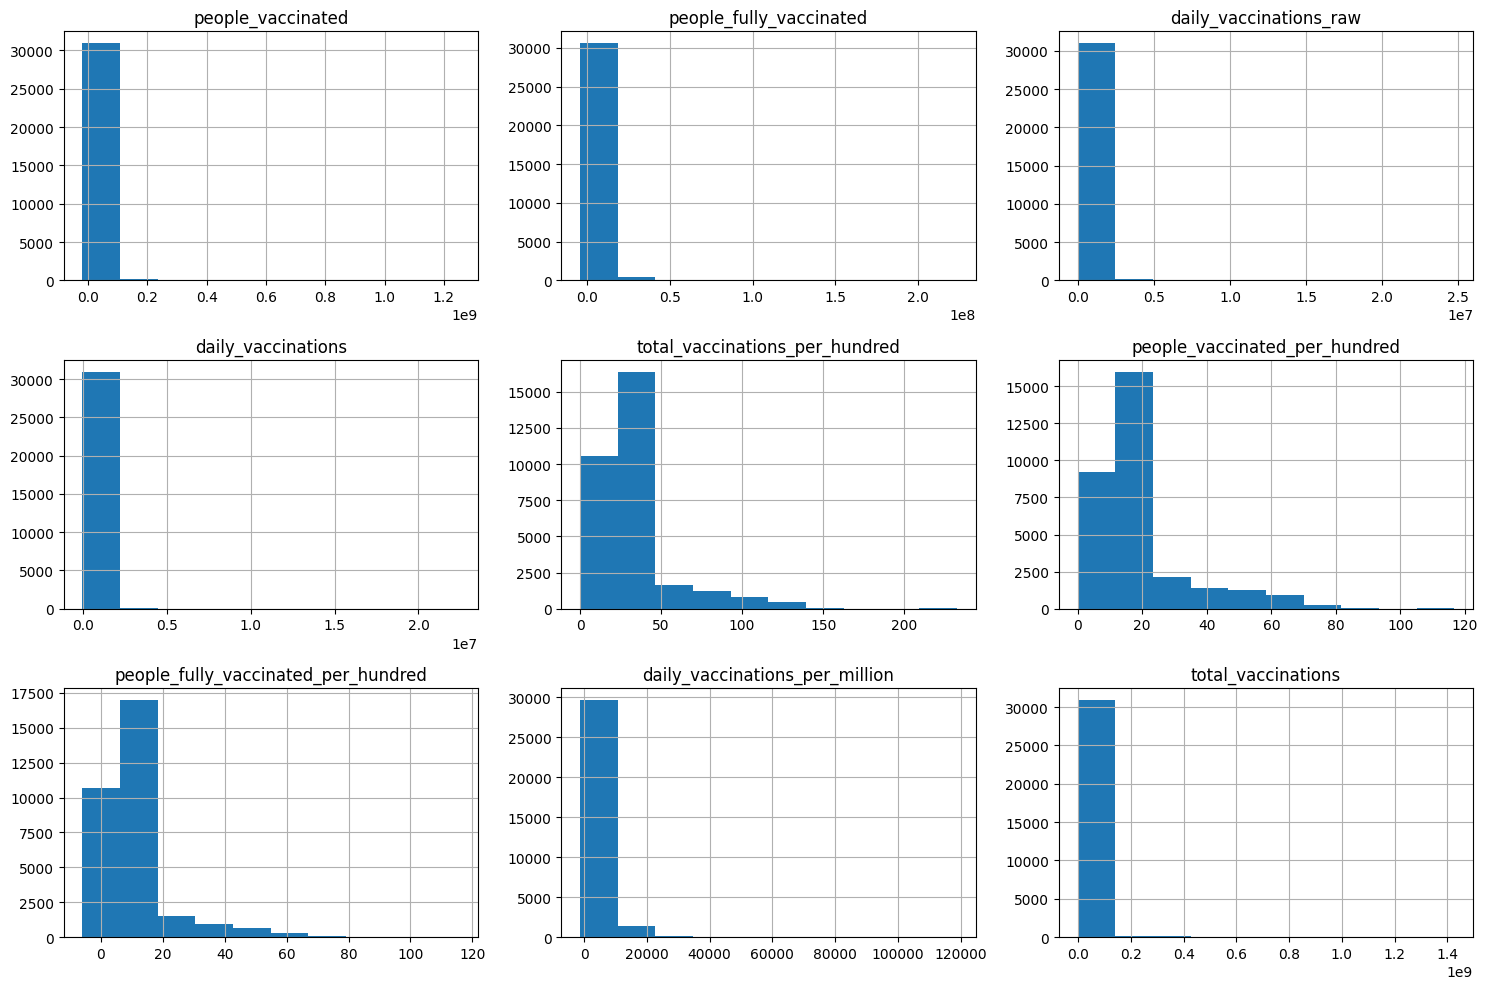

In [18]:
import matplotlib.pyplot as plt

df[numeric_columns].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31240 entries, 0 to 31239
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   iso_code                             31240 non-null  object 
 1   year                                 31240 non-null  int32  
 2   month                                31240 non-null  int32  
 3   day                                  31240 non-null  int32  
 4   people_vaccinated                    31240 non-null  float64
 5   people_fully_vaccinated              31240 non-null  float64
 6   daily_vaccinations_raw               31240 non-null  float64
 7   daily_vaccinations                   31240 non-null  float64
 8   total_vaccinations_per_hundred       31240 non-null  float64
 9   people_vaccinated_per_hundred        31240 non-null  float64
 10  people_fully_vaccinated_per_hundred  31240 non-null  float64
 11  daily_vaccinations_per_milli

In [20]:
df.head()

,iso_code,year,month,day,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,total_vaccinations
0,AFG,2021,2,22,0.000000e+00,-2.327110e+04,60402.640496,48428.489388,0.000000,0.000000,-0.084772,-32.600088,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,0.000000e+00
1,AFG,2021,2,23,-2.544958e+06,1.665912e+06,16603.373961,1367.000000,28.678028,17.576437,11.336212,35.000000,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,-1.014552e+06
2,AFG,2021,2,24,-2.544958e+06,1.665912e+06,16603.373961,1367.000000,28.678028,17.576437,11.336212,35.000000,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,-1.014552e+06
3,AFG,2021,2,25,-2.544958e+06,1.665912e+06,16603.373961,1367.000000,28.678028,17.576437,11.336212,35.000000,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,-1.014552e+06
4,AFG,2021,2,26,-2.544958e+06,1.665912e+06,16603.373961,1367.000000,28.678028,17.576437,11.336212,35.000000,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,-1.014552e+06


## Strorytelling - Visualization

array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'people_vaccinated'}>,
        <Axes: title={'center': 'people_fully_vaccinated'}>,
        <Axes: title={'center': 'daily_vaccinations_raw'}>],
       [<Axes: title={'center': 'daily_vaccinations'}>,
        <Axes: title={'center': 'total_vaccinations_per_hundred'}>,
        <Axes: title={'center': 'people_vaccinated_per_hundred'}>],
       [<Axes: title={'center': 'people_fully_vaccinated_per_hundred'}>,
        <Axes: title={'center': 'daily_vaccinations_per_million'}>,
        <Axes: title={'center': 'total_vaccinations'}>]], dtype=object)

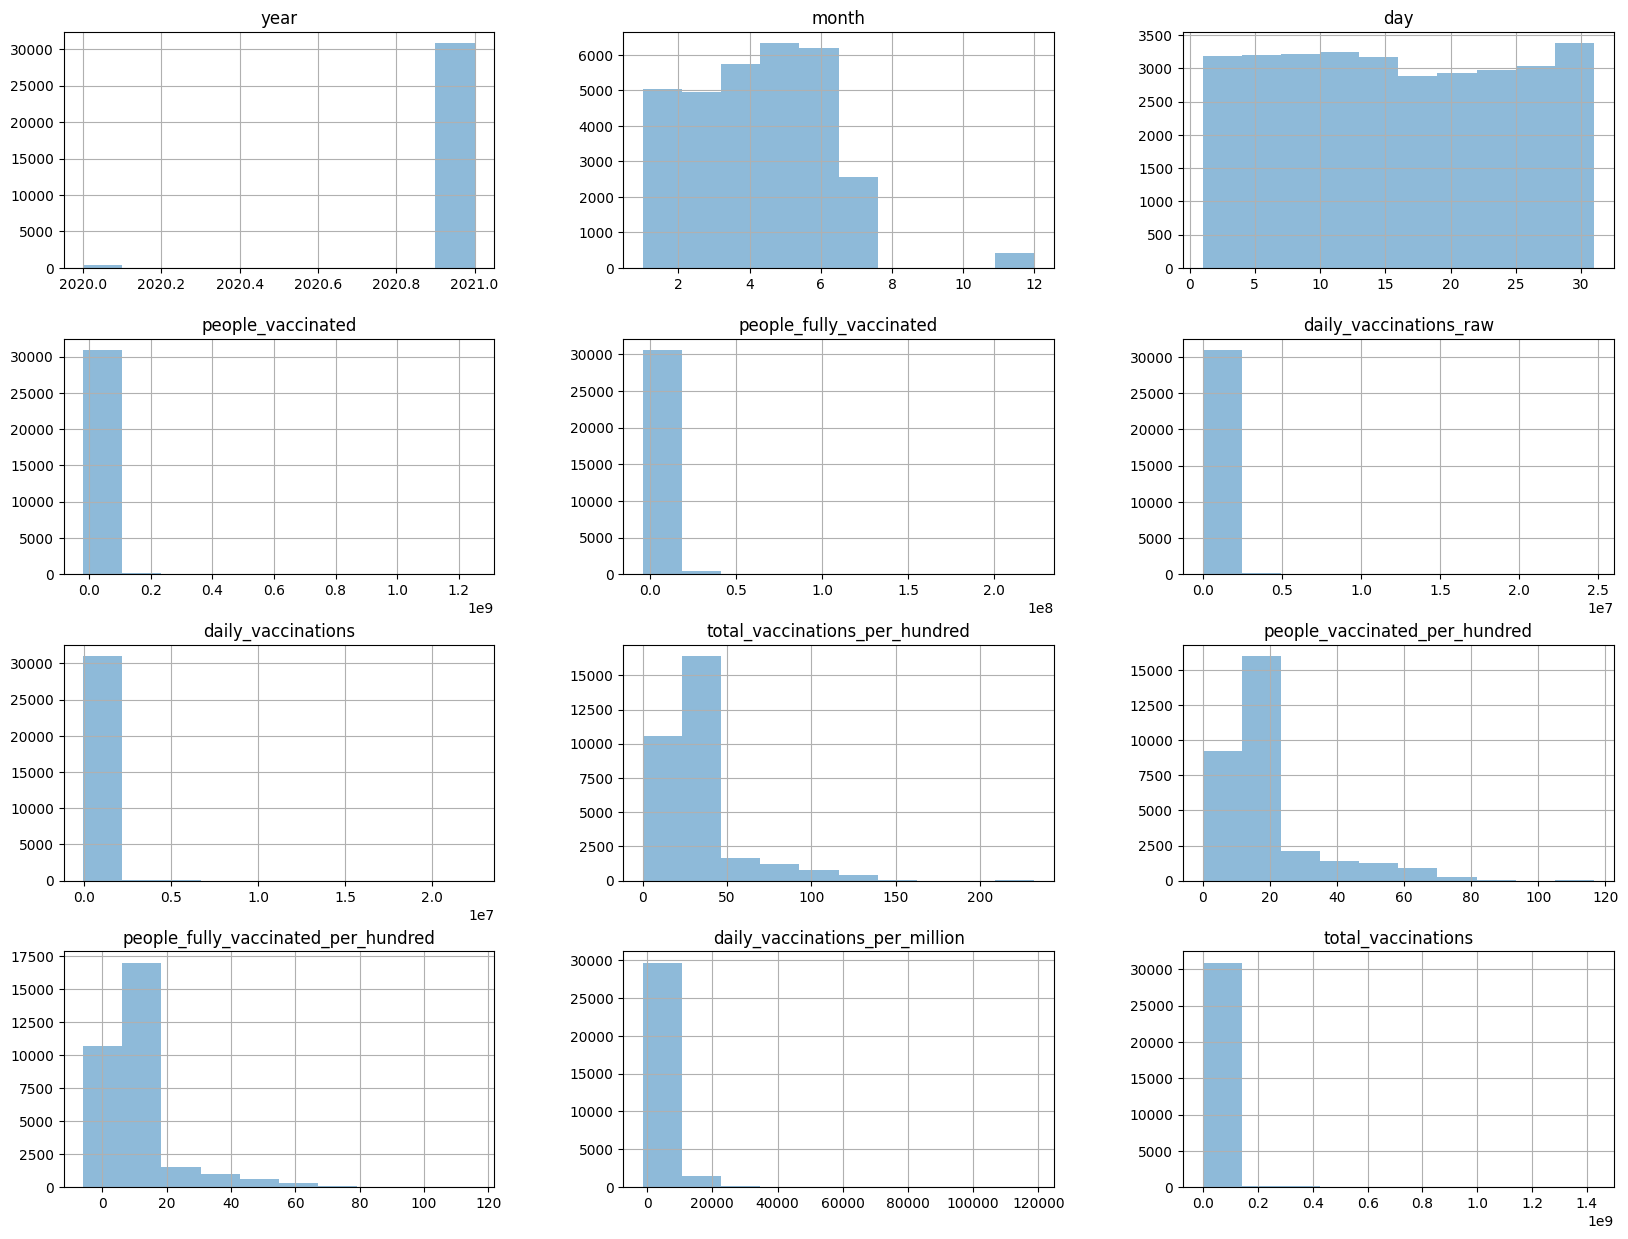

In [21]:
df.hist(alpha=0.5, figsize=(20, 15))

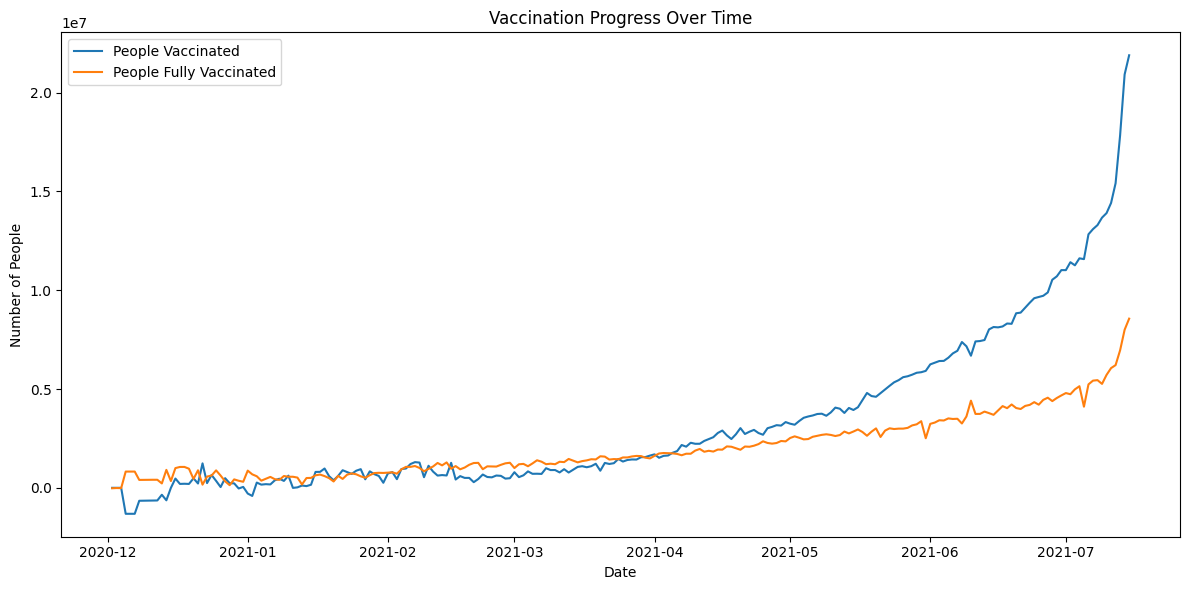

In [22]:
# 1. Line plot: Vaccination progress over time
plt.figure(figsize=(12, 6))
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
df_grouped = df.groupby('date')[['people_vaccinated', 'people_fully_vaccinated']].mean().reset_index()

plt.plot(df_grouped['date'], df_grouped['people_vaccinated'], label='People Vaccinated')
plt.plot(df_grouped['date'], df_grouped['people_fully_vaccinated'], label='People Fully Vaccinated')
plt.title('Vaccination Progress Over Time')
plt.xlabel('Date')
plt.ylabel('Number of People')
plt.legend()
plt.tight_layout()
plt.show()

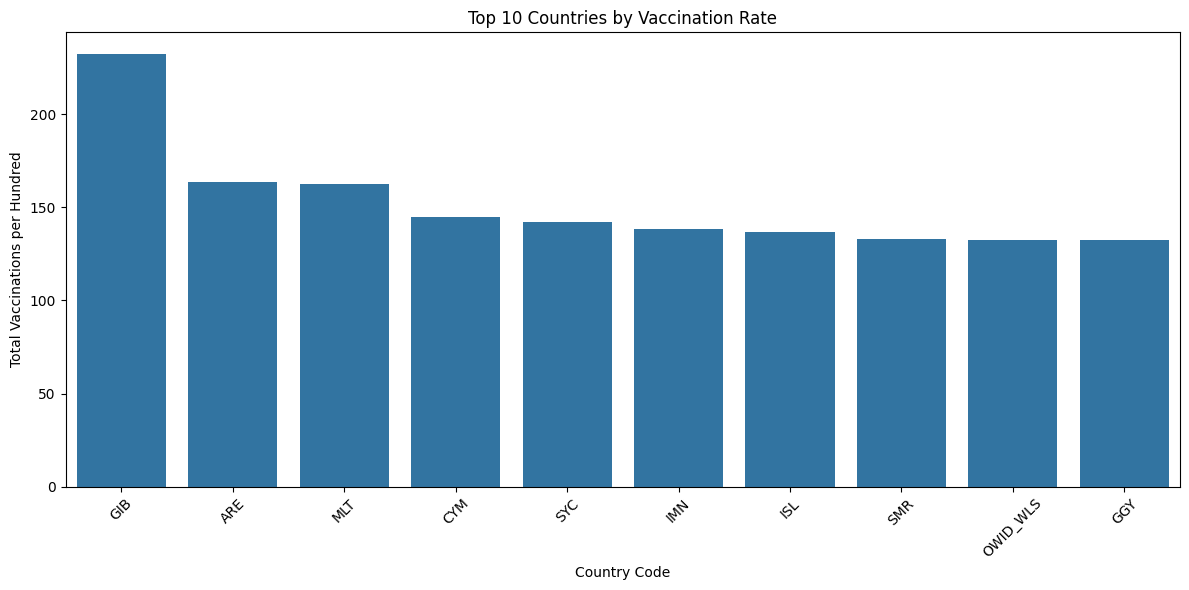

In [23]:
# 2. Bar chart: Vaccination rates across countries
top_10_countries = df.groupby('iso_code')['total_vaccinations_per_hundred'].max().nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_countries.index, y=top_10_countries.values)
plt.title('Top 10 Countries by Vaccination Rate')
plt.xlabel('Country Code')
plt.ylabel('Total Vaccinations per Hundred')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

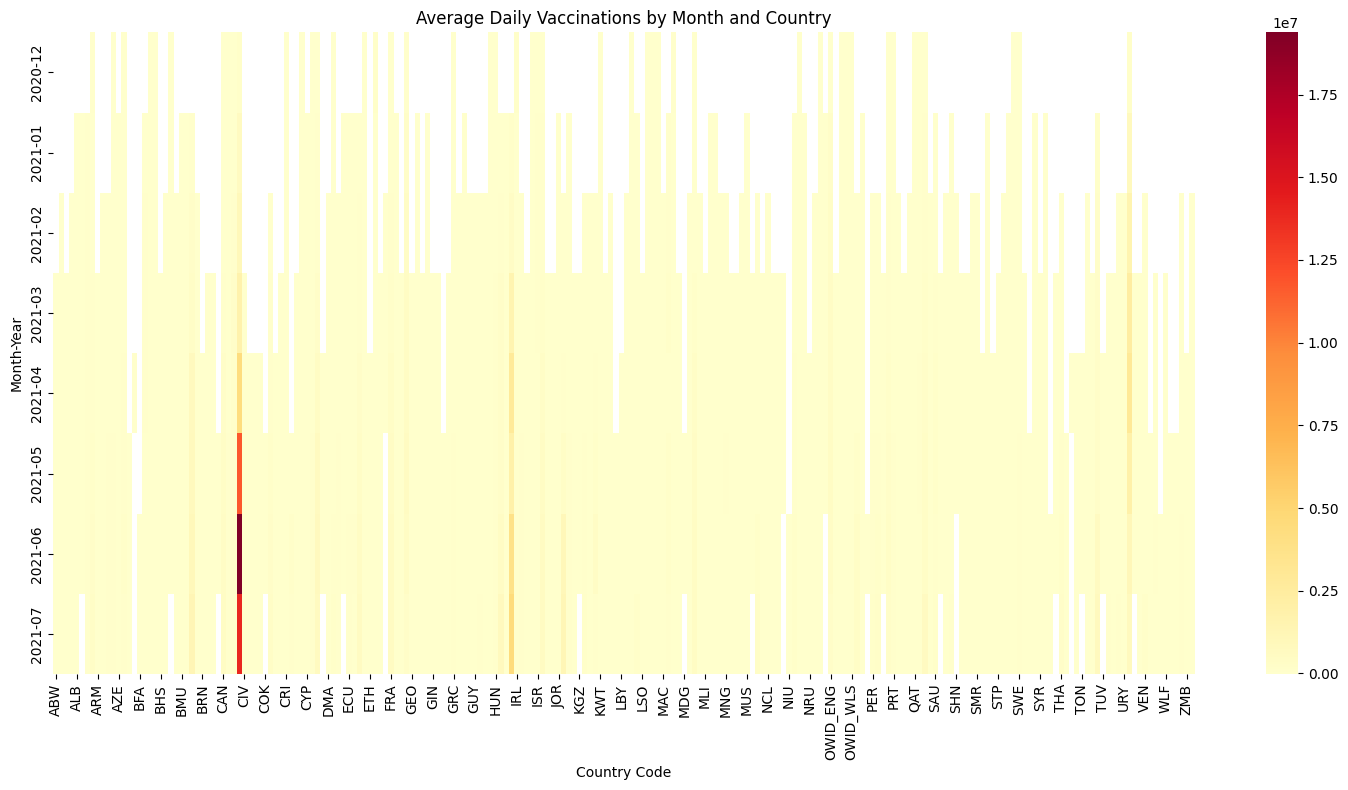

In [24]:
# 3. Heatmap: Daily vaccinations by month and year
df['month_year'] = df['date'].dt.to_period('M')
heatmap_data = df.groupby(['month_year', 'iso_code'])['daily_vaccinations'].mean().unstack()

plt.figure(figsize=(15, 8))
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=False)
plt.title('Average Daily Vaccinations by Month and Country')
plt.xlabel('Country Code')
plt.ylabel('Month-Year')
plt.tight_layout()
plt.show()

In [25]:
import plotly.io as pio
# pio.renderers.default = 'notebook'  # for Jupyter Notebooks
pio.renderers.default = 'browser'   # for IDEs or standalone scripts

In [26]:
# 4. Pie chart: Vaccine types
vaccine_counts = df['vaccines'].value_counts()

fig = px.pie(values=vaccine_counts.values, names=vaccine_counts.index, title='Distribution of Vaccine Types')
fig.show()

In [27]:
# 5. Scatter plot: Total vaccinations vs Vaccinations per hundred
fig = px.scatter(df, x='total_vaccinations', y='total_vaccinations_per_hundred', 
                 color='iso_code', hover_name='iso_code', 
                 title='Total Vaccinations vs Vaccinations per Hundred by Country')
fig.show()


In [28]:
# 6.Animated bubble chart: Vaccination progress over time
# Convert date columns to datetime
df['date'] = pd.to_datetime(df['date'])

# Handle missing or negative values
df['total_vaccinations'] = df['total_vaccinations'].fillna(0).clip(lower=0)
df['people_vaccinated_per_hundred'] = df['people_vaccinated_per_hundred'].fillna(0).clip(lower=0)
df['people_fully_vaccinated_per_hundred'] = df['people_fully_vaccinated_per_hundred'].fillna(0).clip(lower=0)

# Create the animated bubble chart
fig = px.scatter(
    df,
    x="people_vaccinated_per_hundred",
    y="people_fully_vaccinated_per_hundred",
    animation_frame="date",
    animation_group="iso_code",
    size="total_vaccinations",
    color="iso_code",
    hover_name="iso_code",
    log_x=True,
    size_max=55,
    range_x=[0.1, 100],  # Start from 0.1 to avoid log(0) issues
    range_y=[0, 100],
    title="Vaccination Progress by Country Over Time"
)

# Improve the layout
fig.update_layout(
    xaxis_title="People Vaccinated per Hundred",
    yaxis_title="People Fully Vaccinated per Hundred",
    coloraxis_showscale=False  # Hide color scale to reduce clutter
)

# Show the figure
fig.show()

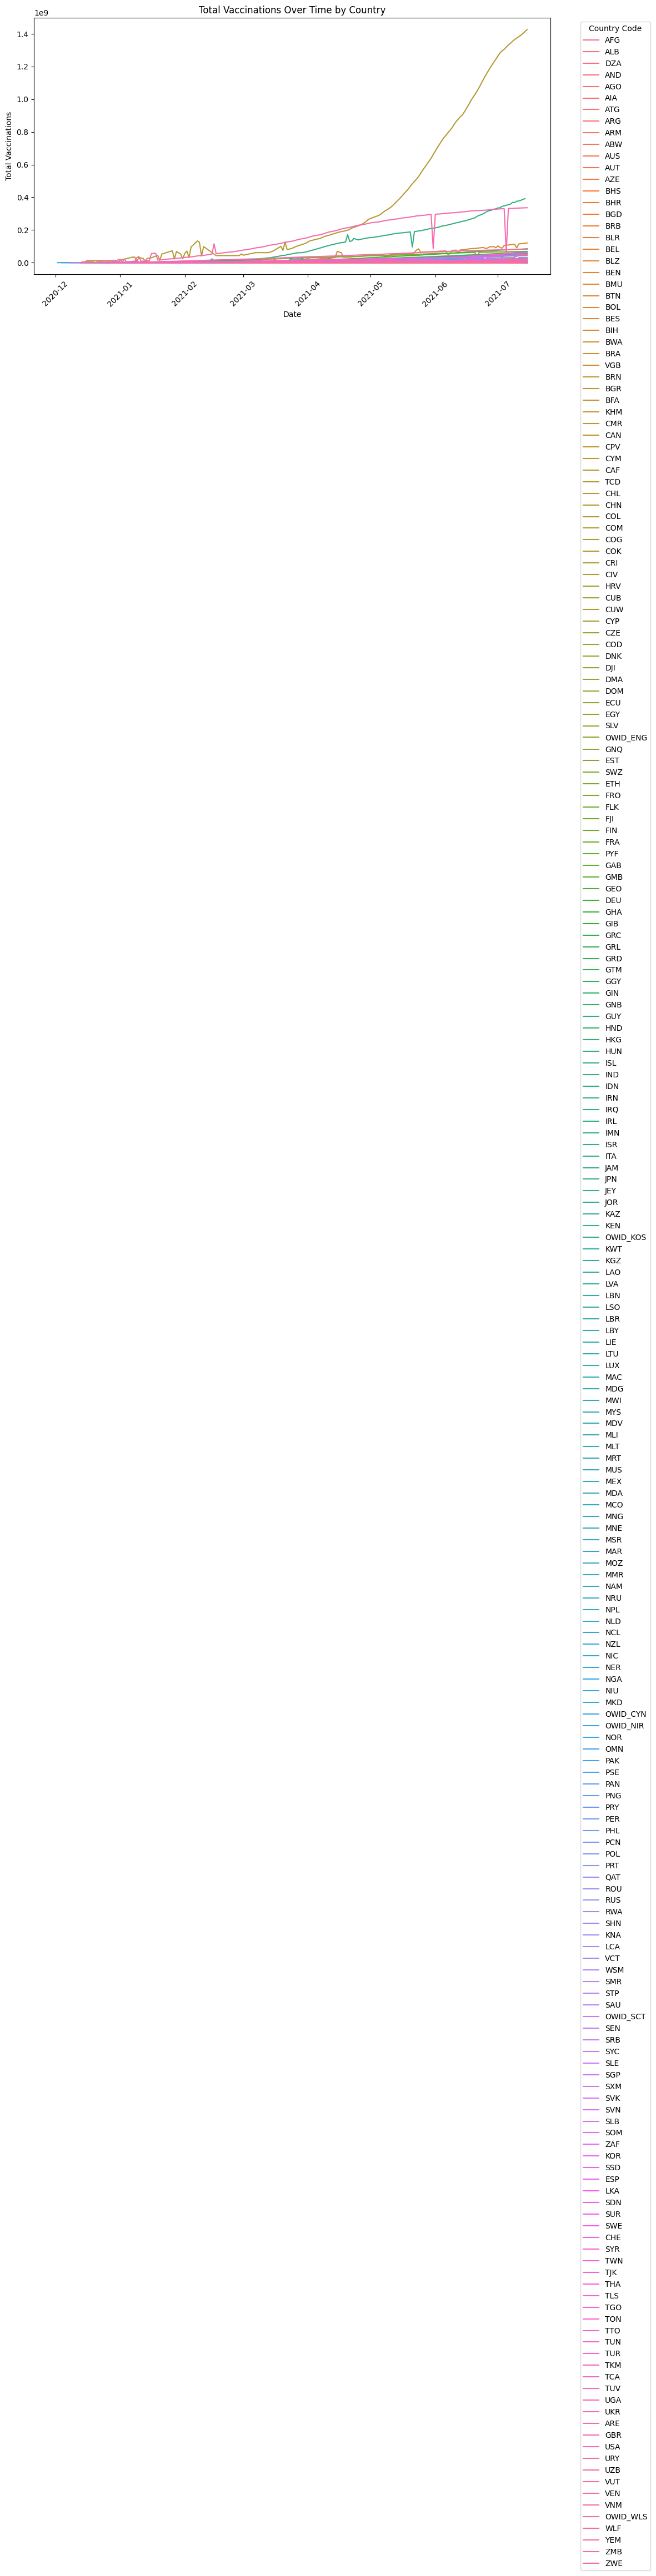

In [29]:
# 7.Time Series Line Plot: Total Vaccinations Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='date', y='total_vaccinations', hue='iso_code', estimator='sum')
plt.title('Total Vaccinations Over Time by Country')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.xticks(rotation=45)
plt.legend(title='Country Code', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


In [30]:
# 8.Create a 3D scatter plot
fig_3d = px.scatter_3d(
    df,
    x='people_vaccinated_per_hundred',
    y='people_fully_vaccinated_per_hundred',
    z='total_vaccinations',
    color='iso_code',
    hover_name='iso_code',
    title='3D Scatter Plot of Vaccination Data',
    labels={'people_vaccinated_per_hundred': 'People Vaccinated per Hundred',
            'people_fully_vaccinated_per_hundred': 'People Fully Vaccinated per Hundred',
            'total_vaccinations': 'Total Vaccinations'},
)

# Show the 3D figure
fig_3d.show()

In [31]:
columns_to_drop = ['month','day','year','month_year']
df = df.drop(columns=columns_to_drop, axis=1)

## Prepare Data for Machine learning

### Frequency Encoding:

---

### 1. Frequency Encoding

**مزایا:**
- سریع و ساده.
- فضای کمتری نسبت به One-Hot Encoding نیاز دارد.
- اطلاعاتی از تعداد تکرار دسته‌ها در داده را به مدل منتقل می‌کند.

**معایب:**
- برای مدل‌های خطی و حساس به ترتیب ممکن است معنی‌دار نباشد.
- اگر دسته‌ها به‌طور مساوی توزیع نشده باشند، ممکن است مدل به سمت دسته‌های پرتکرار تمایل پیدا کند.

**پیشنهاد برای استفاده:**
- برای مدل‌های مبتنی بر درخت (مثل Random Forest یا XGBoost) مناسب است.
- زمانی که متغیر هدف (target) پیچیدگی خاصی ندارد یا با توزیع دسته‌ها ارتباط ندارد.


In [32]:
'''freq = df['source_name'].value_counts(normalize=True)
df['source_name'] = df['source_name'].map(freq)

freq = df['iso_code'].value_counts(normalize=True)
df['iso_code'] = df['iso_code'].map(freq)

freq = df['vaccines'].value_counts(normalize=True)
df['vaccines'] = df['vaccines'].map(freq)'''

"freq = df['source_name'].value_counts(normalize=True)\ndf['source_name'] = df['source_name'].map(freq)\n\nfreq = df['iso_code'].value_counts(normalize=True)\ndf['iso_code'] = df['iso_code'].map(freq)\n\nfreq = df['vaccines'].value_counts(normalize=True)\ndf['vaccines'] = df['vaccines'].map(freq)"

### 2. Target Encoding (روش پیشنهادی )

**مزایا:**
- با استفاده از میانگین متغیر هدف، اطلاعات بیشتری در مورد ارتباط دسته‌ها و خروجی مدل فراهم می‌کند.
- نسبت به Frequency Encoding، قابلیت تبیین بهتری در مدل‌های پیچیده دارد.

**معایب:**
- مستعد نشت داده (data leakage) است اگر بدون روش‌های مناسب استفاده شود.
- نیاز به کروس‌والیدیشن برای جلوگیری از نشت داده.
- زمان اجرا کمی بیشتر است، زیرا به گروه‌بندی و میانگین‌گیری نیاز دارد.

**پیشنهاد برای استفاده:**
- برای مدل‌های خطی (مثل Logistic Regression) و مدل‌های مبتنی بر شبکه عصبی.
- وقتی متغیر هدف اطلاعات مهمی برای دسته‌ها دارد.
- در مسائلی که دسته‌ها ارتباط غیرخطی با متغیر هدف دارند.



### توضیح کد:

**ستون‌های دسته‌ای:**
ستون‌های `source_name`, `iso_code`, و `vaccines` به دلیل تعداد دسته‌های بالا و ارتباط احتمالی با ستون هدف، به Target Encoding نیاز دارند.

**Cross-Validation:**
- در هر بار تکرار، دسته‌ها را فقط با استفاده از داده‌های آموزشی (Train Set) رمزگذاری می‌کنیم.
- داده‌های اعتبارسنجی (Validation Set) از داده‌های آموزشی مستقل هستند تا نشت داده رخ ندهد.

**نتیجه:**
هر دسته بر اساس میانگین مقدار `total_vaccinations` در داده‌های آموزشی رمزگذاری می‌شود.


In [33]:
# وارد کردن کتابخانه‌های لازم
from category_encoders import TargetEncoder
from sklearn.model_selection import KFold

# تعریف ستون‌های دسته‌ای و ستون هدف
categorical_columns = ['source_name', 'iso_code', 'vaccines']
target_column = 'total_vaccinations'

# تنظیم K-Fold Cross-Validation برای جلوگیری از نشت داده
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# ایجاد نسخه کپی از DataFrame اصلی برای ذخیره داده‌های رمزگذاری شده
df_encoded = df.copy()

# حلقه‌ای برای هر بار تکرار K-Fold Cross-Validation
# که ما قراره داده‌ها رو چند بار به دو بخش مختلف تقسیم کنیم: بخشی برای آموزش مدل (train) و بخشی برای اعتبارسنجی مدل (validation).
for train_idx, val_idx in kf.split(df):
    # تقسیم داده‌ها به مجموعه‌های آموزشی و اعتبارسنجی
    train_data, val_data = df.iloc[train_idx], df.iloc[val_idx]
    
    # ایجاد و اعمال Target Encoder
    encoder = TargetEncoder(cols=categorical_columns)
    # رمزگذاری ستون‌های دسته‌ای با استفاده از داده‌های آموزشی
    encoder.fit(train_data[categorical_columns], train_data[target_column])
    # اعمال رمزگذار به داده‌های اعتبارسنجی
    # این خط دسته‌های داده‌های اعتبارسنجی رو به اعداد تبدیل می‌کنه و اون‌ها رو توی یه کپی از داده‌های اصلی ذخیره می‌کنه. این کار باعث می‌شه داده‌های جدید همون طوری که یاد گرفته شده، رمزگذاری بشن.
    df_encoded.loc[val_idx, categorical_columns] = encoder.transform(val_data[categorical_columns])
    
   # چاپ تعداد نمونه‌های آموزشی و اعتبارسنجی
    train_count = len(train_data)
    val_count = len(val_data)
    print(f"تعداد نمونه‌های آموزشی: {train_count}, تعداد نمونه‌های اعتبارسنجی: {val_count}")

    # اطلاعات اضافی در مورد ایندکس‌ها
    print(f"ایندکس‌های آموزشی: {train_idx}, ایندکس‌های اعتبارسنجی: {val_idx}")

تعداد نمونه‌های آموزشی: 24992, تعداد نمونه‌های اعتبارسنجی: 6248
ایندکس‌های آموزشی: [    0     1     2 ... 31236 31238 31239], ایندکس‌های اعتبارسنجی: [    6     7    17 ... 31229 31231 31237]
تعداد نمونه‌های آموزشی: 24992, تعداد نمونه‌های اعتبارسنجی: 6248
ایندکس‌های آموزشی: [    0     1     2 ... 31236 31237 31238], ایندکس‌های اعتبارسنجی: [    3    23    29 ... 31220 31224 31239]
تعداد نمونه‌های آموزشی: 24992, تعداد نمونه‌های اعتبارسنجی: 6248
ایندکس‌های آموزشی: [    1     2     3 ... 31237 31238 31239], ایندکس‌های اعتبارسنجی: [    0     4     5 ... 31221 31230 31233]
تعداد نمونه‌های آموزشی: 24992, تعداد نمونه‌های اعتبارسنجی: 6248
ایندکس‌های آموزشی: [    0     3     4 ... 31237 31238 31239], ایندکس‌های اعتبارسنجی: [    1     2    10 ... 31226 31232 31234]
تعداد نمونه‌های آموزشی: 24992, تعداد نمونه‌های اعتبارسنجی: 6248
ایندکس‌های آموزشی: [    0     1     2 ... 31234 31237 31239], ایندکس‌های اعتبارسنجی: [    9    11    13 ... 31235 31236 31238]


 . تابع `kf.split(df)` دو خروجی برمی‌گرداند: `train_idx` و `val_idx`. این دو خروجی به شرح زیر هستند:

1. **`train_idx`**:
   این یک لیست (آرایه) از ایندکس‌ها (شاخص‌ها) است که نشان می‌دهد کدام نمونه‌ها باید به عنوان داده‌های آموزشی (training set) در نظر گرفته شوند.

2. **`val_idx`**:
   این یک لیست (آرایه) از ایندکس‌ها (شاخص‌ها) است که نشان می‌دهد کدام نمونه‌ها باید به عنوان داده‌های اعتبارسنجی (validation set) در نظر گرفته شوند.

بیایید با یک مثال ساده‌تر توضیح دهیم:
فرض کنید شما یک دیتافریم `df` با 10 نمونه دارید و می‌خواهید آن را به 5 بخش (fold) تقسیم کنید. کد زیر نشان می‌دهد که چگونه KFold این شاخص‌ها را تولید می‌کند:

```python
from sklearn.model_selection import KFold

# فرض کنید df دیتافریم شما با 10 نمونه است
df = pd.DataFrame({'data': range(10)})

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_idx, val_idx in kf.split(df):
    print("Train indices:", train_idx)
    print("Validation indices:", val_idx)
```

خروجی این کد می‌تواند چیزی شبیه به این باشد:

```
Train indices: [1 2 3 4 5 7 8 9]
Validation indices: [0 6]
Train indices: [0 1 2 3 5 6 7 9]
Validation indices: [4 8]
Train indices: [0 1 2 4 5 6 8 9]
Validation indices: [3 7]
Train indices: [0 3 4 5 6 7 8 9]
Validation indices: [1 2]
Train indices: [1 2 3 4 6 7 8 9]
Validation indices: [0 5]
```

در هر تکرار:
- `train_idx` شامل ایندکس‌های نمونه‌هایی است که باید برای آموزش مدل استفاده شوند.
- `val_idx` شامل ایندکس‌های نمونه‌هایی است که باید برای اعتبارسنجی مدل استفاده شوند.


#### کاهش ابعاد با کم کردن داده های نادر 

In [34]:
'''threshold = 10  # حداقل تعداد
rare_categories = df['source_name'].value_counts()[df['source_name'].value_counts() < threshold].index
df['source_name'] = df['source_name'].replace(rare_categories, 'Other')

rare_categories = df['iso_code'].value_counts()[df['iso_code'].value_counts() < threshold].index
df['iso_code'] = df['iso_code'].replace(rare_categories, 'Other')

rare_categories = df['vaccines'].value_counts()[df['vaccines'].value_counts() < threshold].index
df['vaccines'] = df['vaccines'].replace(rare_categories, 'Other')'''

"threshold = 10  # حداقل تعداد\nrare_categories = df['source_name'].value_counts()[df['source_name'].value_counts() < threshold].index\ndf['source_name'] = df['source_name'].replace(rare_categories, 'Other')\n\nrare_categories = df['iso_code'].value_counts()[df['iso_code'].value_counts() < threshold].index\ndf['iso_code'] = df['iso_code'].replace(rare_categories, 'Other')\n\nrare_categories = df['vaccines'].value_counts()[df['vaccines'].value_counts() < threshold].index\ndf['vaccines'] = df['vaccines'].replace(rare_categories, 'Other')"

In [35]:
cols = list(df_encoded.columns)
cols.insert(1, cols.pop(cols.index('date')))
df_encoded = df_encoded[cols]
df_encoded

,iso_code,date,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,total_vaccinations
0,94335.851243,2021-02-22,0.000000e+00,-2.327110e+04,60402.640496,48428.489388,0.000000,0.000000,0.000000,-32.600088,94335.851243,208921.254285,0.0
1,93229.003768,2021-02-23,-2.544958e+06,1.665912e+06,16603.373961,1367.000000,28.678028,17.576437,11.336212,35.000000,93229.003768,205051.084231,0.0
2,93229.003768,2021-02-24,-2.544958e+06,1.665912e+06,16603.373961,1367.000000,28.678028,17.576437,11.336212,35.000000,93229.003768,205051.084231,0.0
3,79667.536293,2021-02-25,-2.544958e+06,1.665912e+06,16603.373961,1367.000000,28.678028,17.576437,11.336212,35.000000,79667.536293,194649.778746,0.0
4,94335.851243,2021-02-26,-2.544958e+06,1.665912e+06,16603.373961,1367.000000,28.678028,17.576437,11.336212,35.000000,94335.851243,208921.254285,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31235,579721.507065,2021-07-11,8.959800e+05,5.954170e+05,24698.276504,18598.000000,10.030000,6.030000,4.010000,1251.000000,206042.492064,3396137.404462,1491397.0
31236,579721.507065,2021-07-12,9.263120e+05,6.055560e+05,40471.000000,23205.000000,10.310000,6.230000,4.070000,1561.000000,206042.492064,3396137.404462,1531868.0
31237,624851.561808,2021-07-13,9.556560e+05,6.198830e+05,43671.000000,27567.000000,10.600000,6.430000,4.170000,1855.000000,233639.316182,3426646.216496,1575539.0
31238,579721.507065,2021-07-14,9.887460e+05,6.248940e+05,38101.000000,30698.000000,10.860000,6.650000,4.200000,2065.000000,206042.492064,3396137.404462,1613640.0


In [36]:
df_encoded.loc[:, 'date'] = df_encoded['date'].apply(lambda x: x.timestamp())

### StandardScaler

In [37]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_encoded), columns=df_encoded.columns)

In [38]:
my_correlation = df_scaled.corr()
my_correlation.sort_values(by=['total_vaccinations'],ascending=False).iloc[0].sort_values(ascending=False)

total_vaccinations                     1.000000
people_vaccinated                      0.991333
daily_vaccinations                     0.902198
daily_vaccinations_raw                 0.868297
people_fully_vaccinated                0.738787
iso_code                               0.645872
source_name                            0.639396
vaccines                               0.610639
total_vaccinations_per_hundred         0.136660
people_fully_vaccinated_per_hundred    0.136139
people_vaccinated_per_hundred          0.124021
daily_vaccinations_per_million         0.102293
date                                   0.096326
Name: total_vaccinations, dtype: float64

ما میتوانیم ستون های که همبستگی بسیار بالایی دارند مثلا iso و source را یکی را به دلخواه پاک کنیم

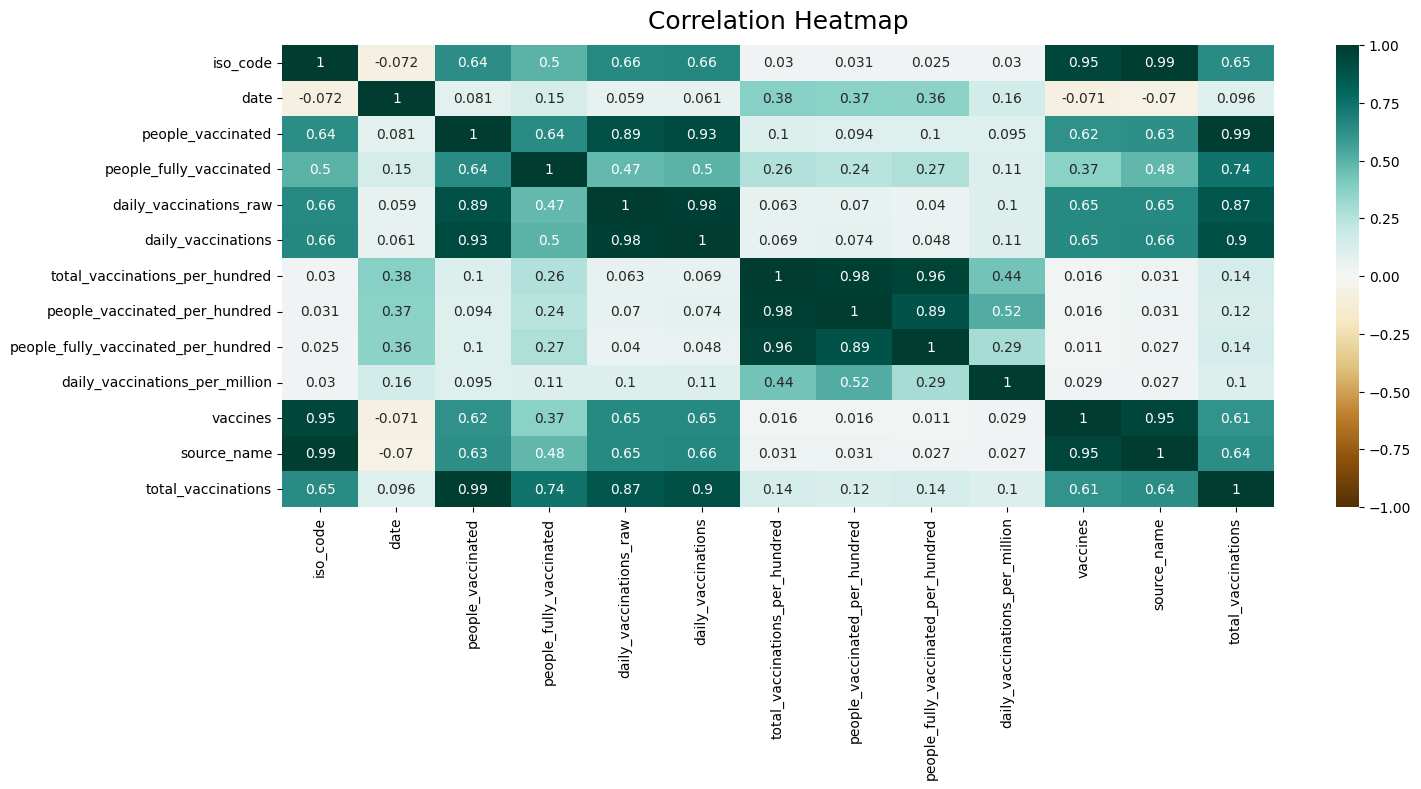

In [39]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(my_correlation, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

# methode 1 for remove upper 0.98 corr

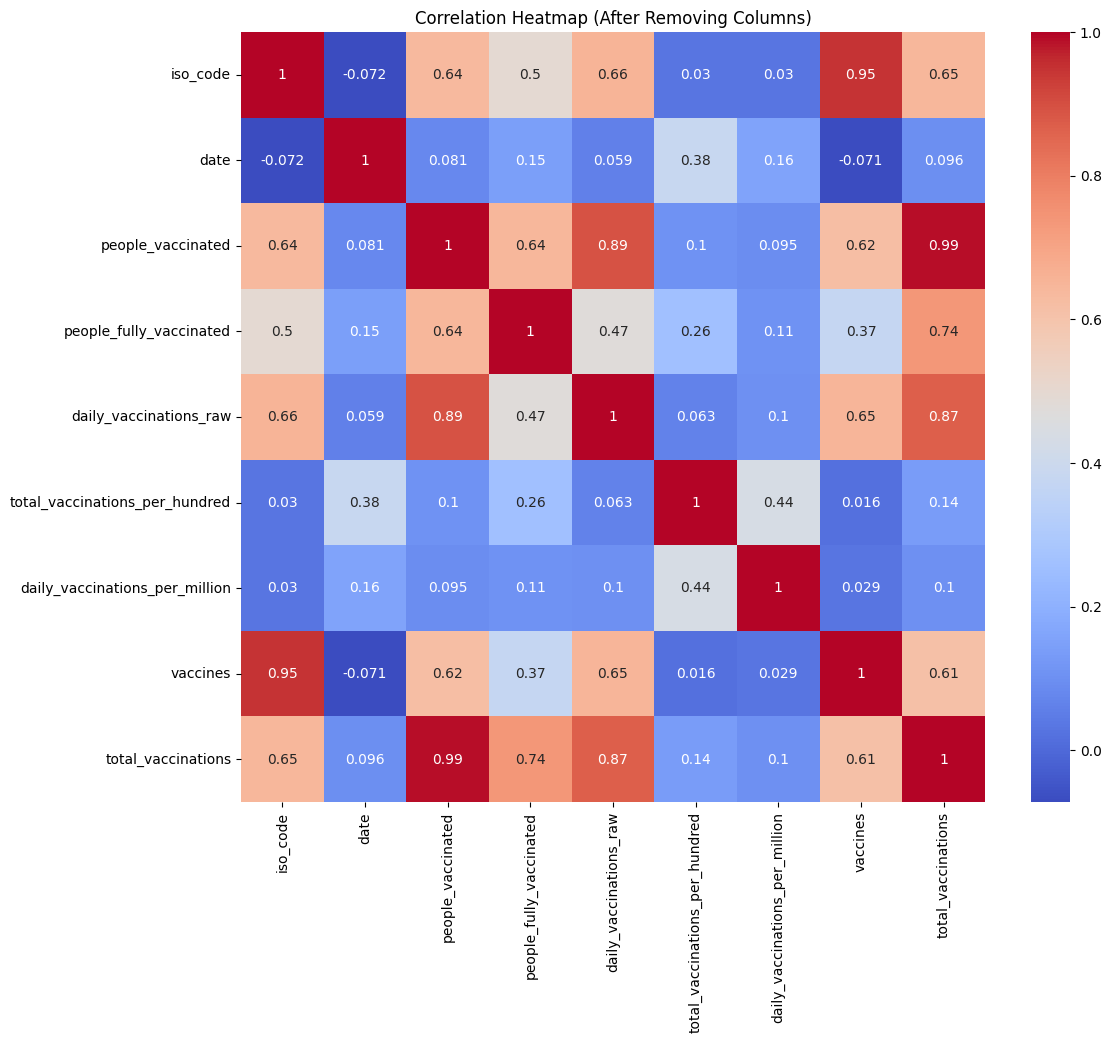

In [40]:

# Assuming your DataFrame is named 'df' and the target column is 'total_vaccinations'
target_column = 'total_vaccinations'

# Separate features and target
X = df_scaled.drop(columns=[target_column])  # Features
Y = df_scaled[target_column]  # Target

# Calculate the correlation matrix for features only
corr_matrix = X.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features while keeping the target column
df_ready_1 = X.drop(columns=to_drop)

# Optionally, re-add the target column to the cleaned DataFrame
df_ready_1[target_column] = Y

# Visualize the correlation heatmap after removing columns
plt.figure(figsize=(12, 10))
sns.heatmap(df_ready_1.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (After Removing Columns)')
plt.show()

# mthode 2

from feature_engine.selection import DropCorrelatedFeatures

# Assuming your DataFrame is named 'df_scaled' and the target column is 'total_vaccinations'
target_column = 'total_vaccinations'

# Separate features and target
X = df_scaled.drop(columns=[target_column])  # Features
Y = df_scaled[target_column]  # Target

# Initialize DropCorrelatedFeatures
tr = DropCorrelatedFeatures(variables=None, method='pearson', threshold=0.98)

# Fit and transform the features DataFrame
X_ready = tr.fit_transform(X)

# Display the results
print("Original DataFrame shape:", X.shape)
print("Transformed DataFrame shape:", X_ready.shape)
print("Features to drop:", tr.features_to_drop_)
print("Correlated feature sets:", tr.correlated_feature_sets_)

# Optionally, re-add the target column to the cleaned DataFrame
df_ready_2 = pd.concat([X_ready, y.reset_index(drop=True)], axis=1)

# Display correlation matrix
print("\nCorrelation Matrix:")
# Visualize the correlation heatmap after removing columns
plt.figure(figsize=(12, 10))
sns.heatmap(df_ready_2.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (After Removing Columns)')
plt.show()

آیا PCA لازم است؟
برای رگرسیون به صورت ضروری نیست:

PCA زمانی مفید است که:

تعداد ویژگی‌ها بسیار زیاد باشد (مثلاً صدها یا هزاران ویژگی).

ویژگی‌ها بسیار همبسته باشند و بخواهید چندهمبستگی را کاهش دهید.

در اینجا، اگرچه چندهمبستگی وجود دارد، اما تعداد ویژگی‌ها (~13) برای مدل‌های رگرسیون قابل مدیریت است.

جایگزین‌های پیشنهادی برای PCA:

انتخاب ویژگی: حذف ویژگی‌های مشابه یا دارای همبستگی ضعیف.

روش‌های منظم‌سازی (Regularization):

استفاده از مدل‌هایی مانند رگرسیون ریج (Ridge) یا لاسو (Lasso) که با چندهمبستگی بهتر برخورد می‌کنند بدون نیاز به کاهش ابعاد.

روند کاری پیشنهادی
به جای استفاده مستقیم از PCA:

1-حذف ستون‌های تکراری:

از آنجایی که iso_code و source_name تقریباً یکسان هستند، می‌توانید یکی از آن‌ها را حذف کنید.

ستون‌هایی با همبستگی ضعیف با total_vaccinations را حذف کنید.

2-اجرای رگرسیون با روش‌های منظم‌سازی:

استفاده از رگرسیون ریج یا لاسو برای مقابله با چندهمبستگی بدون کاهش تفسیرپذیری مدل.

## Applying PCA

 from sklearn.decomposition import PCA
pca_df = PCA(n_components = 2)
X = pca_df.fit_transform(X)
maindf = pd.DataFrame(data = X, columns = ['principal component 1', 'principal component 2'])
maindf
pca_df.components_
pca_df.explained_variance_
finaldf = pd.concat([maindf, df[['Species']]], axis = 1)
finaldf

## Train your model

In [86]:
# Define Plot Learning Curve Function
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None):
    # Create a new figure for the plot with specified size
    plt.figure(figsize=(10, 6))
    
    # Set the title of the plot
    plt.title(title)
    
    # Set the y-axis limits if provided
    if ylim is not None:
        plt.ylim(*ylim)
    
    # Label the x-axis and y-axis
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    # Generate learning curve data: training sizes, training scores, and test scores
    train_sizes, train_scores, test_scores = learning_curve(
        estimator,  # The model to evaluate
        X,          # Feature data
        y,          # Target data
        cv=cv,      # Cross-validation splitting strategy
        n_jobs=n_jobs,  # Number of jobs to run in parallel
        scoring="r2"    # Scoring metric to evaluate the model
    )
    
    # Calculate the mean and standard deviation of training scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    
    # Calculate the mean and standard deviation of test scores
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Enable grid on the plot for better readability
    plt.grid()

    # Fill the area between the mean and standard deviation for training scores
    plt.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,  # Transparency level
        color="r",  # Color for training scores
    )
    
    # Fill the area between the mean and standard deviation for test scores
    plt.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,  # Transparency level
        color="g",  # Color for test scores
    )
    
    # Plot the mean training scores
    plt.plot(train_sizes, train_scores_mean, "o-", color="r", label="Training score")
    
    # Plot the mean test scores
    plt.plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )

    # Add a legend to the plot
    plt.legend(loc="best")
    
    # Return the plot object for further customization or display
    return plt

In [43]:
# Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

In [74]:
# Define Hyperparameter Grids for Various Machine Learning Models
param_grids = {
    # Simple Linear Regression: No hyperparameters to tune
    "Simple Linear Regression": {},

    # Multiple Linear Regression: No hyperparameters to tune
    "Multiple Linear Regression": {},

    # Polynomial Regression: Hyperparameters for polynomial features and fitting
    "Polynomial Regression": {
        "polynomialfeatures__degree": [2, 3, 4],  # Degree of the polynomial features to consider
        "linearregression__fit_intercept": [True, False],  # Whether to fit the intercept term
    },

    # Lasso Regression: Regularization strength parameter
    "Lasso": {
        "alpha": [0.001, 0.01, 0.1, 1]  # Regularization parameter; higher values increase regularization
    },

    # Ridge Regression: Regularization strength parameter
    "Ridge": {
        "alpha": [0.001, 0.01, 0.1, 1]  # Regularization parameter; controls the amount of shrinkage applied
    },

    # ElasticNet: Combination of Lasso and Ridge regularization
    "ElasticNet": {
        "alpha": [0.001, 0.01, 0.1],  # Regularization strength
        "l1_ratio": [0.1, 0.5, 0.9]  # Mix ratio between L1 and L2 regularization
    },

    # Decision Tree: Hyperparameters for controlling tree complexity
    "Decision Tree": {
        "max_depth": [None, 5, 10],  # Maximum depth of the tree; None means nodes are expanded until all leaves are pure
        "min_samples_split": [2, 5]  # Minimum number of samples required to split an internal node
    },

    # Random Forest: Hyperparameters for ensemble learning
    "Random Forest": {
        "n_estimators": [50, 100],  # Number of trees in the forest
        "max_depth": [None, 5, 10]  # Maximum depth of each tree
    },

    # Gradient Boosting: Hyperparameters for boosting algorithm
    "Gradient Boosting": {
        "n_estimators": [50, 100],  # Number of boosting stages to be run
        "learning_rate": [0.01, 0.1],  # Step size shrinkage used in update to prevent overfitting
        "max_depth": [3, 5]  # Maximum depth of the individual regression estimators
    },

    # Support Vector Regression (SVR): Hyperparameters for SVR model
    "SVR": {
        "C": [0.1, 1],  # Regularization parameter; the strength of the regularization is inversely proportional to C
        "epsilon": [0.1, 0.2],  # Epsilon-tube within which no penalty is associated in the training loss function
        "kernel": ["linear", "rbf"]  # Type of kernel to be used in the algorithm
    },

    # XGBoost: Hyperparameters for the XGBoost model
    "XGBoost": {
        "n_estimators": [50, 100],  # Number of boosting rounds
        "max_depth": [3, 5],  # Maximum depth of a tree
        "learning_rate": [0.01, 0.1]  # Step size shrinkage to prevent overfitting
    },
}

In [75]:
# Function to Perform Grid Search
def perform_grid_search(name, model, param_grid):
    # Create a GridSearchCV object with the given model, parameter grid, 5-fold cross-validation,
    # scoring method of negative mean squared error, and utilizing all available CPU cores for processing.
    grid_search = GridSearchCV(
        model, param_grid, cv=5, scoring="neg_mean_squared_error", n_jobs=-1
    )
    # Fit the GridSearchCV object on the training data to find the best parameters.
    grid_search.fit(X_train, y_train)
    # Return the model name, the best parameters identified, and the best score obtained.
    return name, grid_search.best_params_, grid_search.best_score_


In [76]:
# Store Results
results = {}

# Define Models
models = {
    "Simple Linear Regression": LinearRegression(),
    "Multiple Linear Regression": LinearRegression(),
    "Polynomial Regression": Pipeline(
        [
            ("polynomialfeatures", PolynomialFeatures()),
            ("linearregression", LinearRegression()),
        ]
    ),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "ElasticNet": ElasticNet(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "SVR": SVR(),
    "XGBoost": XGBRegressor(),
}

In [77]:
# Parallel execution of grid search
grid_search_results = Parallel(n_jobs=-1)(
    # Apply the perform_grid_search function in parallel for each model in the models dictionary.
    delayed(perform_grid_search)(name, model, param_grids[name])
    for name, model in models.items()
)

# Loop through the results from the parallel execution.
for name, best_params, best_score in grid_search_results:
    # Store the best parameters and best score for each model in the results dictionary.
    results[name] = {"Best Parameters": best_params, "Best Score": best_score}


In [78]:
# Display Grid Search Results
print("Grid Search Results:")
for model_name, result in results.items():
    print(f"{model_name}: {result}")


Grid Search Results:
Simple Linear Regression: {'Best Parameters': {}, 'Best Score': -0.00011900965580654444}
Multiple Linear Regression: {'Best Parameters': {}, 'Best Score': -0.00011900965580654444}
Polynomial Regression: {'Best Parameters': {'linearregression__fit_intercept': True, 'polynomialfeatures__degree': 2}, 'Best Score': -8.598423007298259e-05}
Lasso: {'Best Parameters': {'alpha': 0.001}, 'Best Score': -0.0001287579787170006}
Ridge: {'Best Parameters': {'alpha': 0.001}, 'Best Score': -0.00011900971515145349}
ElasticNet: {'Best Parameters': {'alpha': 0.001, 'l1_ratio': 0.9}, 'Best Score': -0.0001288647768360979}
Decision Tree: {'Best Parameters': {'max_depth': None, 'min_samples_split': 2}, 'Best Score': -0.001347353117457945}
Random Forest: {'Best Parameters': {'max_depth': 10, 'n_estimators': 100}, 'Best Score': -0.0003582322302764631}
Gradient Boosting: {'Best Parameters': {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}, 'Best Score': -0.0005311509456657007}
SV

In [79]:
# Function to Evaluate Model
def evaluate_model_cv(name, model, X, y):
    # Perform cross-validation and calculate negative mean squared error scores using 5-fold CV.
    cv_scores = cross_val_score(
        model, X, y, cv=5, scoring="neg_mean_squared_error", n_jobs=-1
    )
    # Fit the model on the entire training dataset.
    model.fit(X, y)
    # Predict on the training data.
    y_pred_train = model.predict(X)
    # Predict on the test data.
    y_pred_test = model.predict(X_test)

    # Calculate mean squared error on training and test data.
    train_mse = mean_squared_error(y, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)
    # Calculate mean absolute error on training and test data.
    train_mae = mean_absolute_error(y, y_pred_train)
    test_mae = mean_absolute_error(y_test, y_pred_test)
    # Calculate R-squared on training and test data.
    train_r2 = r2_score(y, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)

    # Print the model name.
    print(f"{name}:")
    # Print the cross-validation mean squared error.
    print(f"  CV MSE: {-np.mean(cv_scores):.4f}")
    # Print the training set performance metrics.
    print(
        f"  Train MSE: {train_mse:.4f}, RMSE: {np.sqrt(train_mse):.4f}, MAE: {train_mae:.4f}, R²: {train_r2:.4f}"
    )
    # Print the test set performance metrics.
    print(
        f"  Test MSE: {test_mse:.4f}, RMSE: {np.sqrt(test_mse):.4f}, MAE: {test_mae:.4f}, R²: {test_r2:.4f}"
    )

    # Check for overfitting by comparing train and test R-squared values.
    if train_r2 - test_r2 > 0.1:
        print(f"  The {name} model may be overfitting.")
    else:
        print(f"  The {name} model is not overfitting.")

    # Return the model name and performance metrics.
    return (
        name,
        -np.mean(cv_scores),
        train_mse,
        test_mse,
        train_mae,
        test_mae,
        train_r2,
        test_r2,
    )


In [80]:
# Helper function to apply best parameters
def get_model_with_best_params(name, model, best_params):
    # Check if best_params is not empty.
    if best_params:
        # Special handling for Polynomial Regression.
        if name == "Polynomial Regression":
            model.set_params(**best_params)
        # Handle other pipelines.
        elif isinstance(model, Pipeline):
            model.set_params(**best_params)
        # For other models, create a new instance with the best parameters.
        else:
            model = model.__class__(**best_params)
    # Return the updated model.
    return model


In [81]:
# Apply cross-validation and evaluation to all models
cv_results = Parallel(n_jobs=-1)(
    delayed(evaluate_model_cv)(
        name,
        get_model_with_best_params(name, model, results[name]["Best Parameters"]),
        X_train,
        y_train,
    )
    for name, model in models.items()
)

In [82]:
# Create DataFrame for CV Results
cv_df = pd.DataFrame(
    cv_results,
    columns=[
        "Model",
        "CV MSE",
        "Train MSE",
        "Test MSE",
        "Train MAE",
        "Test MAE",
        "Train R2",
        "Test R2",
    ],
)
print(cv_df)

                         Model    CV MSE     Train MSE  Test MSE  \
0     Simple Linear Regression  0.000119  1.183489e-04  0.000121   
1   Multiple Linear Regression  0.000119  1.183489e-04  0.000121   
2        Polynomial Regression  0.000086  4.545713e-05  0.000048   
3                        Lasso  0.000129  1.279944e-04  0.000130   
4                        Ridge  0.000119  1.183489e-04  0.000121   
5                   ElasticNet  0.000129  1.278566e-04  0.000130   
6                Decision Tree  0.001167  9.112645e-19  0.000497   
7                Random Forest  0.000429  6.492485e-05  0.000153   
8            Gradient Boosting  0.000487  2.695721e-05  0.000259   
9                          SVR  0.001808  2.013624e-03  0.002040   
10                     XGBoost  0.007180  7.014894e-04  0.001792   

       Train MAE  Test MAE  Train R2   Test R2  
0   9.449829e-03  0.009511  0.999885  0.999863  
1   9.449829e-03  0.009511  0.999885  0.999863  
2   5.001292e-03  0.005072  0.999956

In [87]:
# Print the best model
best_model = cv_df.loc[cv_df["Test R2"].idxmax(), "Model"]
print(f"\nThe best performing model is: {best_model}")


The best performing model is: Polynomial Regression


In [88]:
# Display best parameters for the best model
print(f"Best parameters for {best_model}:")
print(results[best_model]["Best Parameters"])

Best parameters for Polynomial Regression:
{'linearregression__fit_intercept': True, 'polynomialfeatures__degree': 2}


In [89]:
# Feature Importance (if applicable)
if best_model in ["Random Forest", "Gradient Boosting", "XGBoost"]:
    # Create an instance of the best model using the best parameters found.
    best_model_instance = models[best_model].__class__(
        **results[best_model]["Best Parameters"]
    )
    # Fit the model on the training data.
    best_model_instance.fit(X_train, y_train)

    # Calculate the feature importance and create a DataFrame.
    feature_importance = pd.DataFrame(
        {
            "feature": range(X.shape[1]),
            "importance": best_model_instance.feature_importances_,
        }
    ).sort_values("importance", ascending=False)

    # Plot the top 10 feature importances using a bar plot.
    plt.figure(figsize=(10, 6))
    sns.barplot(x="importance", y="feature", data=feature_importance.head(10))
    plt.title(f"Top 10 Feature Importance for {best_model}")
    plt.show()


C:\Users\AERO\AppData\Local\Temp\ipykernel_7708\1490096924.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




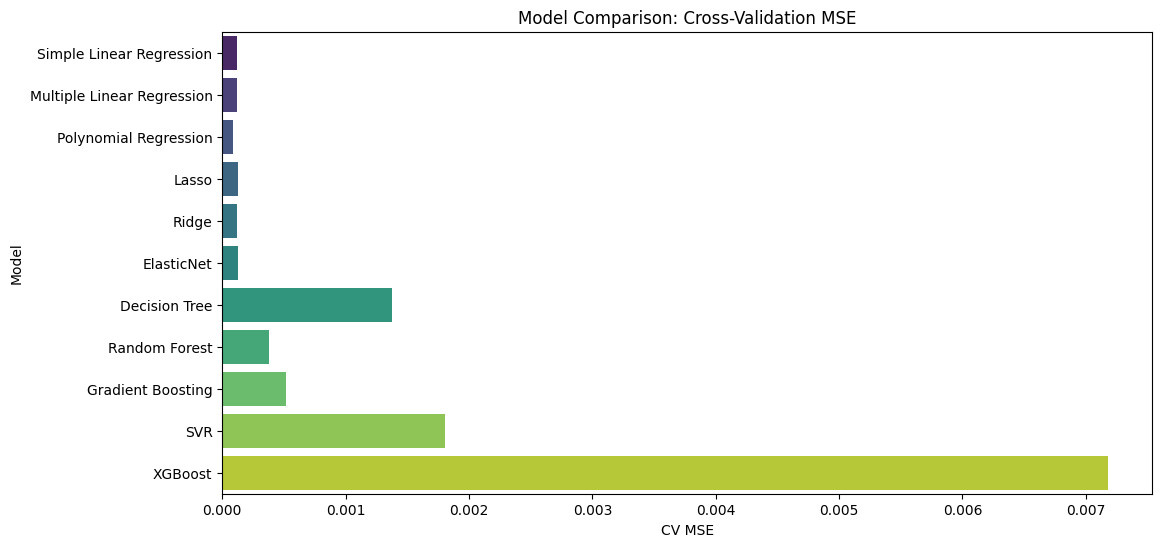

In [56]:
# Visualization of CV results
plt.figure(figsize=(12, 6))
sns.barplot(x="CV MSE", y="Model", data=cv_df, palette="viridis")
plt.title("Model Comparison: Cross-Validation MSE")
plt.show()

In [62]:
cv_df

,Model,CV MSE,Train MSE,Test MSE,Train MAE,Test MAE,Train R2,Test R2
0,Simple Linear Regression,0.000119,0.000118,0.000121,0.009450,0.009511,0.999885,0.999863
1,Multiple Linear Regression,0.000119,0.000118,0.000121,0.009450,0.009511,0.999885,0.999863
2,Polynomial Regression,0.000086,0.000045,0.000048,0.005001,0.005072,0.999956,0.999946
3,Lasso,0.000129,0.000128,0.000130,0.009752,0.009776,0.999876,0.999852
4,Ridge,0.000119,0.000118,0.000121,0.009450,0.009511,0.999885,0.999863
5,ElasticNet,0.000129,0.000128,0.000130,0.009719,0.009744,0.999876,0.999852
6,Decision Tree,0.001374,0.000057,0.000548,0.003273,0.005216,0.999944,0.999378
7,Random Forest,0.000382,0.000068,0.000186,0.002004,0.002653,0.999934,0.999789
8,Gradient Boosting,0.000519,0.000027,0.000290,0.002237,0.003468,0.999974,0.999671
9,SVR,0.001808,0.002014,0.002040,0.039326,0.039708,0.998044,0.997685


C:\Users\AERO\AppData\Local\Temp\ipykernel_7708\4194409904.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




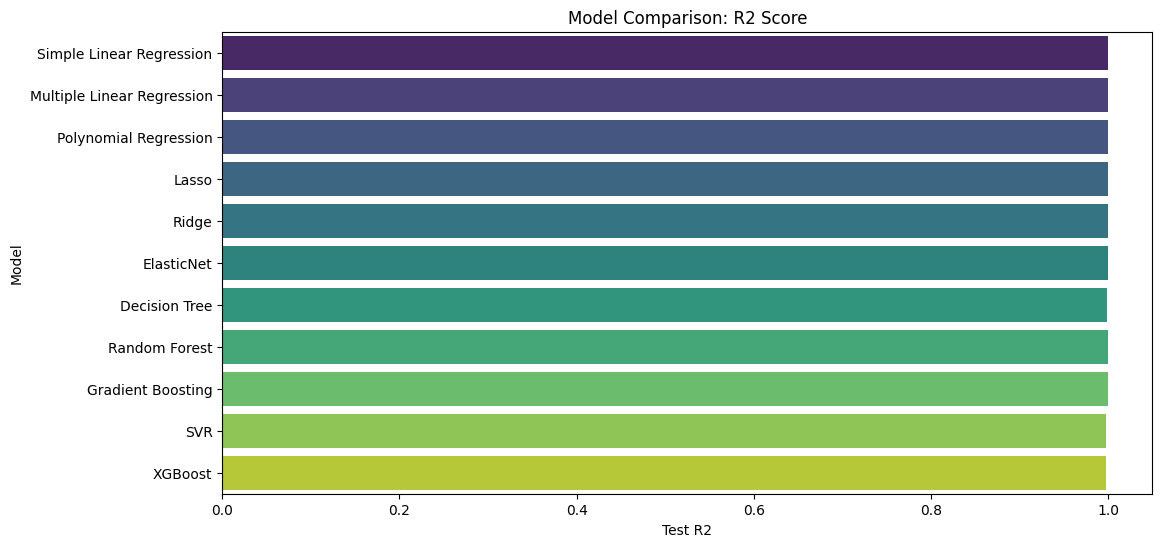

In [63]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Test R2", y="Model", data=cv_df, palette="viridis")
plt.title("Model Comparison: R2 Score")
plt.axvline(0, color="red", linestyle="--")  # Line at R2 = 0
plt.show()

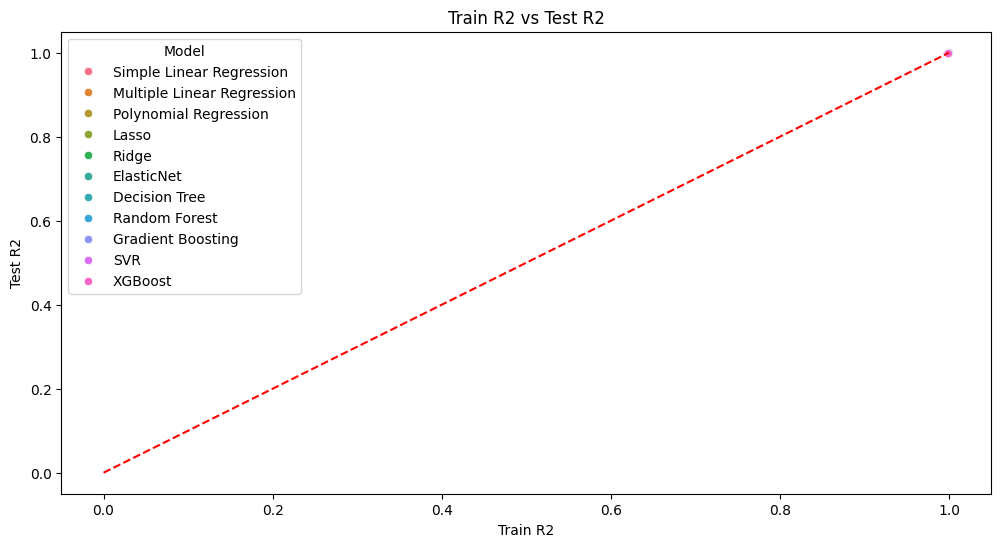

In [64]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x="Train R2", y="Test R2", hue="Model", data=cv_df)
plt.title("Train R2 vs Test R2")
plt.plot([0, 1], [0, 1], "r--")  # Diagonal line
plt.show()

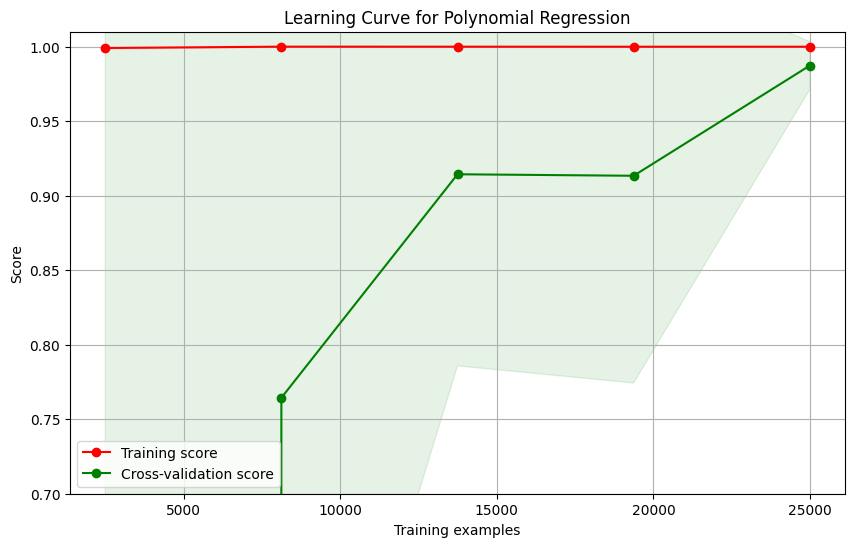

In [68]:
# Plot learning curve for the best model
if best_model == "Polynomial Regression":
    # Create a pipeline for Polynomial Regression with polynomial features and linear regression.
    best_model_instance = Pipeline(
        [
            ("polynomialfeatures", PolynomialFeatures()),
            ("linearregression", LinearRegression()),
        ]
    )
    # Set the best parameters found for the Polynomial Regression model.
    best_model_instance.set_params(**results[best_model]["Best Parameters"])
else:
    # Create an instance of the best model using the best parameters found for other models.
    best_model_instance = models[best_model].__class__(
        **results[best_model]["Best Parameters"]
    )

# Plot the learning curve for the best model using the specified parameters.
plot_learning_curve(
    best_model_instance,
    f"Learning Curve for {best_model}",
    X,
    Y,
    ylim=(0.7, 1.01),  # Set the y-axis limits for the plot.
    cv=5,  # Perform 5-fold cross-validation.
    n_jobs=-1,  # Utilize all available CPU cores for parallel processing.
)
# Display the plot.
plt.show()


In [67]:
# ذخیره کردن دیتافریم در فایل pickle
with open('imputed_df.pkl', 'wb') as f:
    # ذخیره کردن دیتافریم df در فایل pickle به نام imputed_df.pkl
    pickle.dump(df, f)

# بررسی برابری دو دیتافریم (باید True باشد)
# چاپ نتیجه مقایسه دیتافریم اصلی (df) با دیتافریمی که از فایل pickle بارگذاری شده است (loaded_df)
print(df.equals(loaded_df))


True
